# Note

This notebook is composed of a breakdown of all the parts required for the New York taxi trip problem and should be used along with the corresponding modules in the course. Although these are teaching materials, you should use the methods explained here to develop a solution using the New York City collisions data for the insurance case study outlined in the course.

Next to each module title there is a small triangle. To expand this, just click on it.

#Problem: Can we accurately predict the number of taxi trips for any given day of the week?

## Module 2: Get the data

Here we will set up our notebook by importing all of the required packages and the given data. You should have already moved the CSV file into your Google Drive.

**The first package is Pandas which you can [find on the Pandas website](https://pandas.pydata.org/).**

Pandas is a fast, powerful, flexible and easy-to-use open source data analysis and manipulation tool which is built on top of the Python programming language. Pandas has functions for analysing, cleaning, exploring and manipulating data. It allows us to analyse Big Data and make conclusions based on statistical theories. Pandas is especially useful as it can clean messy data sets and make them readable and relevant, which is very important for Data Science.

Here are some [nice, simple tutorials on the W3 Schools website](https://www.w3schools.com/python/pandas/default.asp) that can help you learn more if you would like to expand your knowledge.


**The second package is [NumPy which is available on their website](https://numpy.org/).**

NumPy is an open source project aiming to enable numerical computing with Python. It was created in 2005, building on the early work of the Numeric and Numarray libraries.

NumPy aims to provide an array object that is up to 50 times faster than traditional Python lists. The array object in NumPy is called ndarray – it provides a lot of supporting functions that make working with ndarray very easy. Arrays are very frequently used in Data Science, where speed and resources are very important.

Here are some [simple NumPY tutorials on W3 Schools](https://www.w3schools.com/python/numpy/numpy_intro.asp) if you want to learn more.


**The third package is [seaborn which you can download here](https://seaborn.pydata.org/).**

Seaborn is a Python data visualisation library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. We will be using it for making some visualisations of the data.

Here are some [simple tutorials on W3 Schools](https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp) if you want to learn more.


**The fourth package is [Matplotlib which you can find on their website](https://matplotlib.org/).**

Matplotlib is a comprehensive library for creating static, animated and interactive visualisations in Python.

Matplotlib is an open source, low-level graph plotting library in Python that serves as a visualisation utility. We will be using it for making some visualisations of the data.

Here are [some simple tutorials](https://www.w3schools.com/python/matplotlib_intro.asp) if you want to learn more.

Let's get started. The first thing we have to do is import these packages using the following commands.

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as ps
import plotly.graph_objects as go
import datetime as dt




# Ignore the line under here, this is to suppress a warning
pd.options.mode.chained_assignment = None

This piece of code is used to set the size of the figures. We will need to use this again later when looking at some plots.

In [ ]:
#set the size of our plots as they are a little small by default.
plt.rcParams["figure.figsize"] = (20,5)

As a note for later, here is how we set the size of the figures back to default:

In [ ]:
# reset figure sizes to default
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Next, we are going to link up our Google Drive. Remember, you should have already uploaded your CSV file into your Google Drive. You will be asked to sign into your account when you run this code cell.

In [ ]:
# Link with your google drive
from google.colab import drive
# drive.mount('/content/gdrive')

Now we link to your file in our Google Drive. You should have uploaded your file to your drive as per the instructions.

In [ ]:
# get our collated taxi trip and weather data from google drive
df = pd.read_csv('/content/gdrive/MyDrive/LBD_New_York_taxi_trips_and_weather_data.csv')



Let's make sure our data is OK by having a quick look at the first few rows of the data.

In [ ]:
df.head()

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
0,5,2009,1,16,16/01/2009,14.0,-2.1,1031.2,10.0,7.5,9.9,19.0,17.1,10.0,0.04,1.2,0,535200
1,4,2013,1,24,24/01/2013,16.8,-1.7,1023.0,10.0,6.7,15.0,27.0,21.9,12.0,0.00,999.9,0,533039
2,6,2011,1,22,22/01/2011,18.7,2.1,1013.5,10.0,5.7,9.9,20.0,24.1,14.0,0.01,5.9,0,541375
3,7,2010,1,31,31/01/2010,20.5,0.6,1017.7,10.0,6.1,9.9,17.1,30.0,14.0,0.00,999.9,0,469208
4,7,2010,1,10,10/01/2010,20.4,0.4,1023.0,10.0,6.1,11.1,15.0,28.0,14.0,0.00,999.9,0,445633


Brilliant. Now we are ready to move onto the next stage. Just as a note, you will need to run all of the cells from the top in order when moving onto the next modules. To re-run module 2, you can click on the run button when it is minimised, or you can run all by clicking on the **Runtime** menu (menu bar above) and selecting **Run all**.

Now, back to the course materials.

Well done.

## Module 3: Basic statistics and visualisations

In this module we will be learning about how use the packages we have imported to clean and visualise the data in order to fully understand and help us build a model to predict the number of taxi trips on any given day of the week.

In the last module, we imported the data and viewed the first five rows in the imported CSV file. The data in the CSV file was imported into a pandas dataframe. Now we have **day** of the week as the first column and **NUM_TRIPS** as the last column. We can observe that the years are mixed up, which makes things a little difficult to work with. We possibly could have resolved this in BigQuery (the data warehouse), but just for learning purposes and to understand pandas a bit more, let's order the data here. Firstly, we want to order by year, then month and then by day in an ascending order (1, 2, 3, 4, and so on).


In [ ]:
df = df.sort_values(["year", "mo", "da"], ascending = (True, True, True)) # order the data by year, month, day in ascending order.
df.head() # check the data again by viewing the first 5 rows

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
74,4,2009,1,1,01/01/2009,19.6,1.0,1020.6,10.0,11.6,22.0,32.1,26.1,15.1,0.04,999.9,0,327625
100,5,2009,1,2,02/01/2009,28.7,13.1,1017.5,9.3,5.6,14.0,19.0,33.1,21.9,0.00,999.9,0,376708
37,6,2009,1,3,03/01/2009,33.5,17.7,1012.6,10.0,7.7,13.0,20.0,37.9,30.0,0.00,999.9,0,432710
24,7,2009,1,4,04/01/2009,31.7,11.3,1018.1,10.0,7.3,12.0,17.1,42.1,25.0,0.00,999.9,0,367525
78,1,2009,1,5,05/01/2009,41.1,21.7,1014.3,10.0,6.3,9.9,14.0,43.0,37.9,0.00,999.9,0,370901


Excellent. The **sort_values** method can be used for ordering data. Next, why don't we review the basic statistics of the data? We can use the **describe** method.

In [ ]:
df.describe()

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,3.999453,2011.000547,6.518600,15.731947,55.437582,42.122265,1261.600821,8.888239,6.841685,13.369201,334.040755,63.566193,48.475766,0.315022,931.973851,0.113239,475115.804158
std,2.000410,1.413633,3.450833,8.798189,16.577664,18.639857,1465.785728,1.679650,40.342602,40.282364,456.947273,17.665703,15.706778,4.062322,250.792696,0.316971,70426.053715
min,1.000000,2009.000000,1.000000,1.000000,11.500000,-5.400000,983.100000,1.300000,0.200000,4.100000,14.000000,17.100000,6.100000,0.000000,1.200000,0.000000,4.000000
25%,2.000000,2010.000000,4.000000,8.000000,42.275000,27.375000,1011.500000,8.200000,3.600000,8.000000,18.100000,48.900000,36.000000,0.000000,999.900000,0.000000,448461.000000
50%,4.000000,2011.000000,7.000000,16.000000,56.600000,43.400000,1016.000000,9.900000,4.800000,11.100000,22.900000,64.900000,48.900000,0.000000,999.900000,0.000000,485338.000000
75%,6.000000,2012.000000,10.000000,23.000000,69.825000,58.400000,1021.400000,10.000000,6.400000,14.000000,999.900000,79.000000,62.100000,0.080000,999.900000,0.000000,520148.000000
max,7.000000,2013.000000,12.000000,31.000000,92.600000,74.300000,9999.900000,10.000000,999.900000,999.900000,999.900000,102.900000,84.900000,99.990000,999.900000,1.000000,849414.000000


What is going on here? You can scroll horizontally to see the statistics for all of the columns. Let's break down what we see:

For every column, such as: **day**, ..., **temp**, ..., **NUM_TRIPS**; we have a bunch of rows with basic statistical values.



*   The first row is row **count**, which unsurprisingly is **1828**, as we already calculated.
*   The next row is the **mean** (sometimes known as the **average**).

*   Then there is **std** for **standard deviation**, which is a measure of how spread out numbers are.
*   We have **min**imum and **max**imum values.

*   We have the **first quartile (25%)**, which is the value under which 25% of data points are found when they are arranged in increasing order.
*   The **median (50%)** (which is another type of **average**) is the middle number in a sorted ascending or descending list of numbers and can be more descriptive of a dataset than the mean
*  Finally, there is the **third quartile (75%)**, which is the middle value between the median and the highest value (maximum) of the dataset. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point

You will notice that there is a column missing: **pickup_date**. This is because this is a string and these stats cannot be calculated.

**Review of the data:**

*   **day** – Day of the week given as an integer, with 1 for Monday through to 7 for Sunday.
*   **da, mo, year** and **pickup_date** – These are self-explanatory.
*   **temp** – Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9.
*   **dewp** – Mean dew point for the day in degrees Fahrenheit to tenths. Missing = 9999.9.
*   **slp** – Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9.
*   **visib** – Mean visibility for the day in miles to tenths. Missing = 999.9.
*   **wdsp** – Mean wind speed for the day in knots to tenths. Missing = 999.9.
*   **mxpsd** – Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9.
*   **gust** – Maximum wind gust reported for the day in knots to tenths. Missing = 999.9.
*   **max** – Maximum temperature reported during the day in Fahrenheit to tenths. (The time of the maximum temperature report varies by country and region so this will sometimes not be the maximum for the calendar day.) Missing = 9999.9.
*   **min** – Minimum temperature reported during the day in Fahrenheit to tenths. (The time of the minimum temperature report varies by country and region so this will sometimes not be the minimum for the calendar day.) Missing = 9999.9.
*   **prcp** – Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; this will usually not end with the midnight observation, meaning it may include the latter part of previous day. Additionally, .00 indicates no measurable precipitation (includes a trace). Missing = 99.99. Note: many stations do not report '0' on days with no precipitation therefore '99.99' will often appear on these days. Also, for example, a station may only report a six-hour amount for the period during which rain fell. See the **Flag** field for the source of the data.
*   **sndp** – Snow depth in inches to tenths (last report for the day if reported more than once). Missing = 999.9. Note: most stations do not report '0' on days with no snow on the ground therefore '999.9' will often appear on these days.
*   **fog** – Indicators (1 = yes and 0 = no or not reported) for occurrence during the day.
*   **NUM_TRIPS** – A count of the number of taxi trips recorded on a given day.

At this early stage, the first thing we are going to check is for linear relationships between two columns. Generally, we want to find one column that correlates with the number of taxi trips (**NUM_TRIPS**).

A good way to start is to create a correlation matrix.

In [ ]:
corrMatrix = df.corr(numeric_only=True)
#sn.heatmap(corrMatrix, annot=True)
fig = px.imshow(corrMatrix)
fig.update_yaxes(tickfont=dict(family='Century Gothic', size=14))
fig.update_xaxes(tickfont=dict(family='Century Gothic', size=14), tickangle=75)
alt = "Hello"
#plt.show()
fig.show()

Let's break this down a little bit. On the left-hand side from top to bottom you can see all of the numerical column names from **day** to **NUM_TRIPS**. Along the bottom you can see the same column names. What you can see in the cells is a value of the correlation (linear) between different pairs. On the diagonal you can see 1s: this represents 100% correlation because **day** obviously correlates with itself and in fact so does everything else (year correlates with year, NUM_TRIPS correlates with NUM_TRIPS and so on). This is not the important part in our discovery; basically we want to see which of these columns correlates with **NUM_TRIPS**.

Have a look at the bottom row (NUM_TRIPS). You will notice that as you move from left to right there will be a small coloured rectangle with a number in it – this is the title of the column that **NUM_TRIPS** is being compared against. The closer this number is to 1 or -1, the greater the linear correlation. In fact, in the bottom right you can see that **NUM_TRIPS** has a strong positive correlation with itself. We should ignore this. We obviously want to check different columns with **NUM_TRIPS** and at this stage we will ignore **year**, **mo** and **da**.

We also want to be able to predict the number of taxi trips on a given day so let's start with **day**. Remember, we created data that categorised days as 1 (Monday) through to 7 (Sunday). You can see that there is a very weak positive correlation of 0.11.

Here is a reminder for determining a good correlation:

*   0 - 0.2 Very weak
*   0.2 - 0.4 Weak
*   0.4 - 0.6 Moderate
*   0.6 - 0.8 Strong
*  0.8 - 1.0 Very strong

Remember, this applies for negative numbers up to -1; where positive numbers show a positive correlation and negative numebrs show a negative correlation. There are a lot more details to this but for now a loose understanding is all we need. You can read a [summary on correlation](https://online.stat.psu.edu/stat200/book/export/html/67) from the Department of Statistics at Penn State University.

Let's have a closer look at **day** versus **NUM_TRIPS** for the data from 2009 to 2013.

In [ ]:
# Set the y-axis scale from 0 to 870000, using the summary above
# The maximum (max) value for NUM_TRIPS is 849414. Using 870000 as the y-axis maximum gives us a better visualisation of the data.
# plt.ylim(0, 870000)
# # Create a scatter plot showing day (x-axis) versus number of trips with the output variable, NUM_TRIPS on the y-axis
# # Using a . and the name of the column in the dataframe allows you to select that data, there is another method we will get to soon.
# plt.scatter(df.day, df.NUM_TRIPS)
# # Show the plot
# plt.show()

# Create a custom color scale that uses the Plasma palette
# but limits itself to the lower 80% of the Plasma range
custom_plasma_scale = [
    [0, px.colors.sequential.Plasma[0]],  # Start of the Plasma scale
    # Map points in between as needed; this example directly jumps to clamping
    [0.8, px.colors.sequential.Plasma[-2]],  # Roughly the 80% mark in the Plasma palette
    [1, px.colors.sequential.Plasma[-2]]  # Clamp the color scale to the color at 80%
]

def find_first_monday_of_september(year):
    #"""Find the first Monday of September for the given year."""
    # September 1st of the given year
    date = dt.datetime(year, 9, 1)
    # Calculate how many days to add to get to the first Monday (1=Monday, 7=Sunday)
    days_to_add = (7 - date.weekday()) % 7
    first_monday = date + dt.timedelta(days=days_to_add)
    return first_monday


def adjust_calendar_to_labor_day(year, day_of_year):
        # Find the first Monday of September (Labor Day)
    labor_day = find_first_monday_of_september(year)
    labor_day_previous_day = labor_day - dt.timedelta(days=1)  # The day after Labor Day
    labor_day_previous_day_of_year = labor_day_previous_day.timetuple().tm_yday


    # Before the day after Labor Day, wrap around to the end of the cycle
    days_in_year = 366 if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0) else 365
    return (day_of_year - labor_day_previous_day_of_year) % days_in_year

def convert_date_to_zero_indexed_cycle_day_grouped_by_day_of_week(year,month,day, day_num):
    date = dt.datetime(year, month, day)
    day_of_year = date.timetuple().tm_yday

    adjusted_day_of_year = adjust_calendar_to_labor_day(year, day_of_year)

    day_of_total_cycle = (adjusted_day_of_year) + (day_num*366)
    return day_of_total_cycle

def convert_date_to_zero_indexed_cycle_day_grouped_by_day_of_year(year, month, day, day_num):
    date = dt.datetime(year, month, day)
    day_of_year = date.timetuple().tm_yday

    adjusted_day_of_year = adjust_calendar_to_labor_day(year, day_of_year)

    # Calculate day of total cycle with the adjusted day_of_year
    day_of_total_cycle = (adjusted_day_of_year + day_num) + (6 * adjusted_day_of_year)

    return day_of_total_cycle

def show_correlation_matrix(df, title):
    corrMatrix = df.corr(numeric_only=True)
    fig = px.imshow(
        corrMatrix,
        width=1000,
        height=1000,
        title=title,
        color_continuous_scale='PiYG'
        )
    fig.update_yaxes(tickfont=dict(family='Century Gothic', size=14))
    fig.update_xaxes(tickfont=dict(family='Century Gothic', size=14))

    alt = "Hello"
    fig.show()


days_titles = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' ]



fig = ps.make_subplots(rows=1, cols=7, subplot_titles=days_titles)

prcp_cutuff = 1
trips_cutoff_max = 600_000
trips_cutoff_min = 300_000
ZICD = 'ZICD_grouped_by_week_day'
ZICD_YEAR_DAY = 'ZICD_grouped_by_year_day'

df.replace({9999.9: np.nan, 999.9: np.nan, 99.99: np.nan}, inplace=True)

df.loc[df['day'] == 7, 'day'] = 0 # change Sunday to zero-index start of week

cleaned_df = df[
    (df['prcp'] <= prcp_cutuff) &
    (df['NUM_TRIPS'] <= trips_cutoff_max) &
    (df['NUM_TRIPS'] >= trips_cutoff_min)
    ]

cleaned_df[ZICD] = cleaned_df.apply(lambda row: convert_date_to_zero_indexed_cycle_day_grouped_by_day_of_week(row['year'], row['mo'], row['da'], row['day']), axis=1)
cleaned_df[ZICD_YEAR_DAY] = cleaned_df.apply(lambda row: convert_date_to_zero_indexed_cycle_day_grouped_by_day_of_year(row['year'], row['mo'], row['da'], row['day']), axis=1)

# mean_prcp_per_zicd = cleaned_df.groupby(ZICD)['prcp'].count().reset_index()



# correlation_data = []
# for day in cleaned_df['zero_indexed_cycle_day'].unique():
#     # Filter the data frame for unique ZICD
#     day_df = cleaned_df[cleaned_df['zero_indexed_cycle_day'] == day]
#     # Calculate correlation for trips and precips
#     corr = day_df[['NUM_TRIPS', 'prcp']].corr().iloc[0,1]
#     correlation_data.append((day, corr))

# corr_df = pd.DataFrame(correlation_data, columns=['zero_indexed_cycle_day', 'correlation'])

# cleaned_df.head()

# corr_fig = px.scatter(
#     corr_df,
#     x='zero_indexed_cycle_day',
#     y='correlation',
#     title='Correlation between NUM_TRIPS and prcp across Days of the Year',
#     labels={'zero_indexed_cycle_day': 'Day of the Year (0-indexed)', 'correlation': 'Correlation (NUM_TRIPS vs prcp)'}
#     )

# corr_fig.show()

#df.drop(['year', 'mo', 'da'], axis=1, inplace=True)



for i in range(0,7):
    filtered_df = cleaned_df[cleaned_df['day']==(i)]

    fig.add_trace(
        go.Scatter(x=filtered_df['prcp'], y=filtered_df['NUM_TRIPS'], mode='markers', name=f'Day: {days_titles[i]}'),
        row=1, col=(i+1)
    )


fig.update_layout()



#fig = px.scatter(
#    df,
 #   x='day',
  #  y='NUM_TRIPS',
   # title='Daily Number of Trips'
#)
fig.show()

num_trips_to_zicd = px.scatter(
    cleaned_df,
    x=ZICD,
    y='NUM_TRIPS',
    color='day',
    color_continuous_scale=custom_plasma_scale,  # Use the custom Plasma scale
    title='NUM_TRIPS / '+ZICD
)

num_trips_to_zicd_year = px.scatter(
    cleaned_df,
    x=ZICD_YEAR_DAY,
    y='NUM_TRIPS' ,
    color='day',
    color_continuous_scale=custom_plasma_scale,  # Use the custom Plasma scale
    title='NUM_TRIPS / '+ZICD_YEAR_DAY
)



num_trips_to_zicd.show()

num_trips_to_zicd_year.show()

show_correlation_matrix(cleaned_df, 'Overall Correlation')

day_dfs = []

for day in range(0,7):
  day_dfs.append(cleaned_df[cleaned_df['day']==day])
  day_dfs[day].style.set_caption('Day ' + str(day))

counter = 0

for day_df in day_dfs:
    day = days_titles[counter]
    show_correlation_matrix(day_df, day)
    counter += 1

Before we talk about the plot, let's discuss the code. Initially, we used **plt.ylim**(0, 870000). In this instance, we are using matplotlib and stipulating that in our next plot we want a scale on the y-axis from 0 to 870000. You might think 870000 is a weird number but think back to when we used the **describe** method. The **max** number of **NUM_TRIPS** in the data was given as 849414. So I thought a number that was slightly more than that would be a good number for the scale.

Next, we create a scatter plot using **day** (**df.day** equals **day** within the dataframe and similarly with **NUM_TRIPS**). This plots points where x (day of the week) and y (NUM_TRIPS) are defined as something like (1, 300000). This would plot a point on a Monday with 300,000 taxi trips.

Lastly, we show this plot using **plt.show()**.

Now for the plot itself.

In terms of a trend, it looks as though there is an increase in the number of trips from days 1 to 6 and a bit of a dip on day 7. However, it is a bit messy.

It is clear that we will want to deal with outliers. Let's use opacity to try and get a better understanding of the trend we suspect is happening with respect to day of the week and the number of taxi trips. I could explain this, but think of it as a density of sorts. It should visualise the main bulk of the data. We do this using an alpha channel. It doesn't matter what this means at this point.

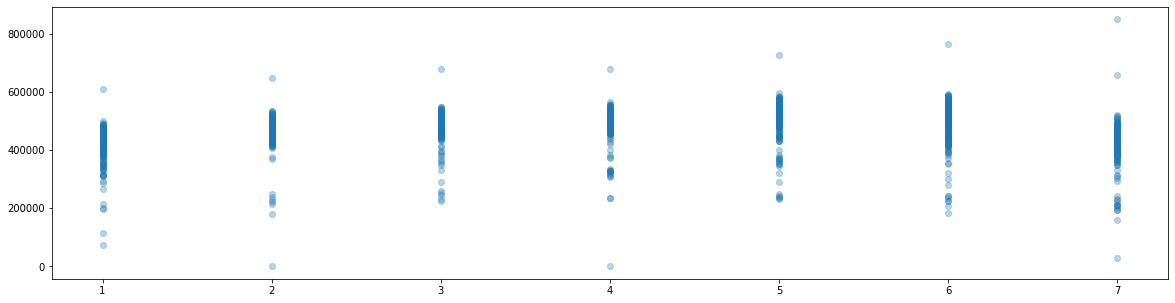

In [ ]:
# We make another scatter plot and as you can see, I have added alpha=0.3
# Play with this value and see what it does (change values from 0 - 1)
plt.scatter(df.day, df.NUM_TRIPS, alpha=0.3)
plt.show()

This is interesting, it does appear that as the days increase from Monday to Saturday, the number of trips increase in a linear fashion.

We have data for the years 2009 to 2013. Let's see if we can do something about these outliers.

Looking at the plot above we can probably get rid of all the data above 630000 **NUM_TRIPS** and below 300000 **NUM_TRIPS**. This is crude but we are only investigating. Basically, I used a ruler to work it out.

In [ ]:
df_300000_cleaned = df[df["NUM_TRIPS"] > 300000] # Create a new dataframe keeping all datapoints where NUM_TRIPS are greater than 350000
df_cleaned = df_300000_cleaned[df_300000_cleaned["NUM_TRIPS"] < 630000] # Using the new dataframe we just created, keep all datapoints where NUM_TRIPS are less than 600000

In the code snippet above, we define a new dataframe with the name **df_300000_cleaned** that obtains all of the data where **NUM_TRIPS** in the dataframe **df** is greater than 300,000.

Then in the next line we create a new dataframe called **df_cleaned** based on the dataframe we just created **df_300000_cleaned** but removing every row where **NUM_TRIPS** in **df_300000_cleaned** is less than 630,000.

Now that we have done this, let's look at our plot again.

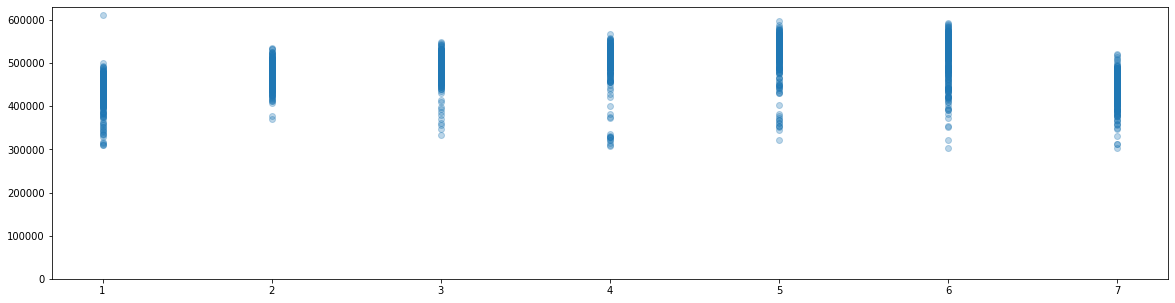

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_cleaned.day, df_cleaned.NUM_TRIPS, alpha=0.3)
plt.show()

This looks a bit better, with a bit less noise. At this stage, I could possibly just make Sunday the first day of the week and get a decent improvement in positive correlation between **day** and **NUM_TRIPS**, but I want to investigate each year first and see what we have. Based on the data before it was cleaned, it looks as though there is some corruption in at least one of the years.

We are going to create another dataframe, **df_2009**, where **year** is equal to 2009. You can see the pattern in the comments below.

In [ ]:
# Separate the data into a new dataframe, df_2009. using the pattern <dataframe>["column_name"] also allows you to get the data for that column.
# Here we have obtained the data where the year is 2009.
df_2009 = df_cleaned[df_cleaned["year"] == 2009]

Let's make a correlation matrix for 2009. Remember, just focus on the bottom row.

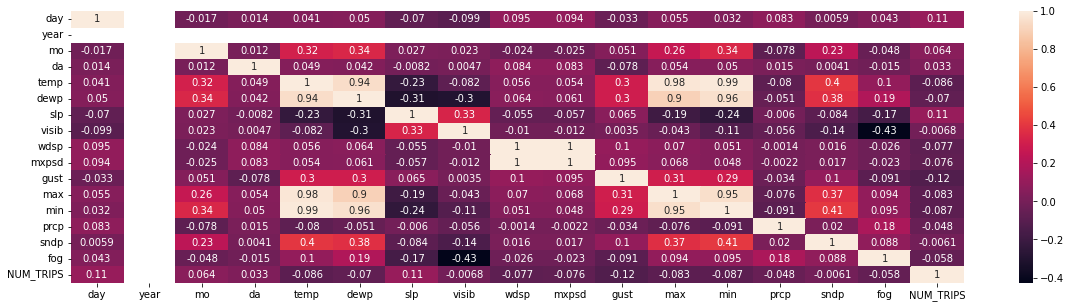

In [ ]:
corrMatrix = df_2009.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

No change. Let's have a look at a scatter plot of **day** versus **NUM_TRIPS** again.

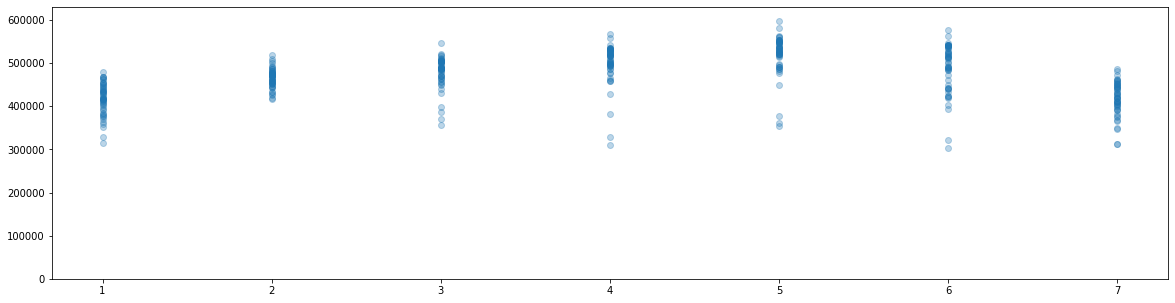

In [ ]:
# Make a scatter plot of day of the week versus the number of taxi trips
plt.ylim(0, 630000)
plt.scatter(df_2009.day, df_2009.NUM_TRIPS, alpha=0.3)
plt.show()

Although there was no change in the correlation matrix, this actually looks pretty promising. Using our judgement, we can see that there is an increase from day 1 to day 5 (and perhaps day 6). We can also see that Sunday is lower than Monday. Let's see what happens if we move Sunday to day 1 and consequently shift every other day along (so that Saturday becomes 7).

Using similar methods from earlier, we firstly add 1 to all the days (1 becomes 2, 7 becomes 8). Then we set all 8s to 1. This gives us our categories and changes Sunday (which was 7) to day 1.

In [ ]:
df_2009.loc[df_2009['day'] > 0, 'day'] = df_2009['day']+1 # change all days by adding 1.
df_2009.loc[df_2009['day'] == 8, 'day'] = 1 # change days that equal 8 to day 1

Don't worry about the warnings. Also, only press the above once. If you press **run** more than once, it will continue to shift days along. Next, we can use a scatter plot to see how it looks.

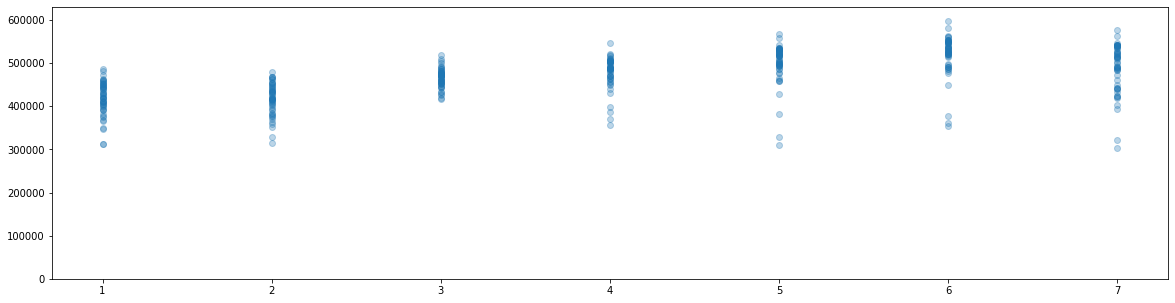

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2009.day, df_2009.NUM_TRIPS, alpha=0.3)
plt.show()

It looks very promising indeed. Let's make another correlation matrix.

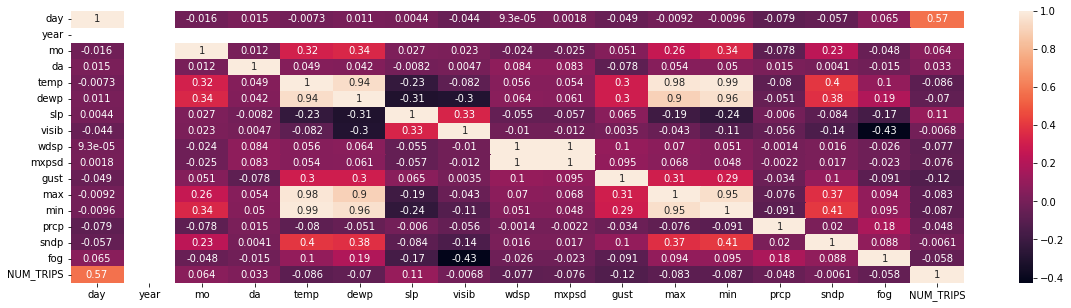

In [ ]:
corrMatrix = df_2009.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Great! That is a massive improvement. With only a tiny bit of cleaning we have improved the correlation between **day** and **NUM_TRIPS** by 0.46 (or 46%).

Remember, we are going to ignore **year**, **mo** and **da**, but we can see that **temp** has a very weak negative correlation at -0.13, **slp** has a very weak postive correlation and **gust** has a very weak negative correlation.

However, not everything is as simple as looking at these numbers. Let's look at **temp**, **slp** and **gust** first.

Here is a scatter plot of **temp** versus **NUM_TRIPS**:

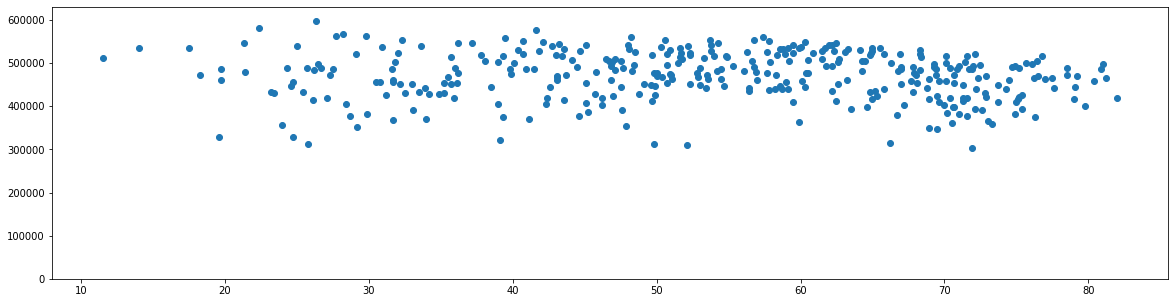

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2009.temp, df_2009.NUM_TRIPS)
plt.show()

This looks good in the sense that there is nothing particularly strange here. Now, **slp**:

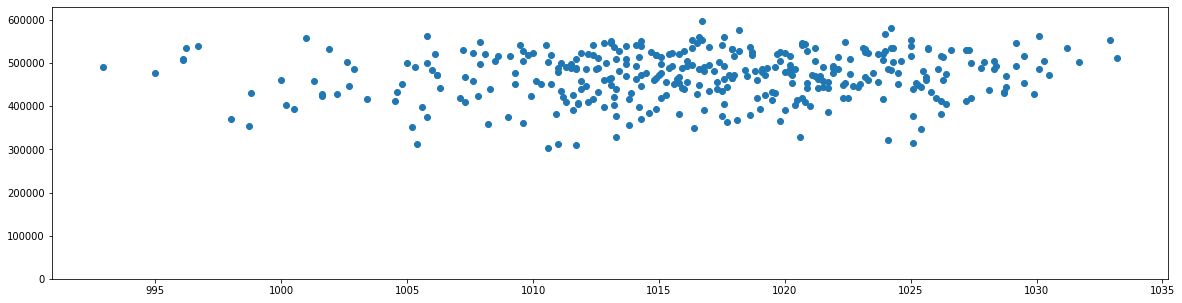

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2009.slp, df_2009.NUM_TRIPS)
plt.show()

Again, this seems reasonable.

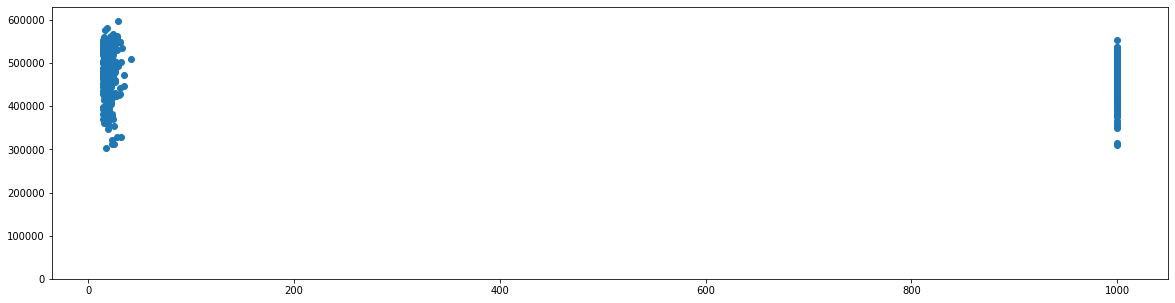

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2009.gust, df_2009.NUM_TRIPS)
plt.show()

But what is this? It looks very strange indeed! If you remember from the descriptions of the data, it was noted that missing data is given as 999.9:

**gust – Maximum wind gust reported for the day in knots to tenths. Missing =
999.9.**

Since **gust** is similar to **wdsp**, let's take a look at that too.

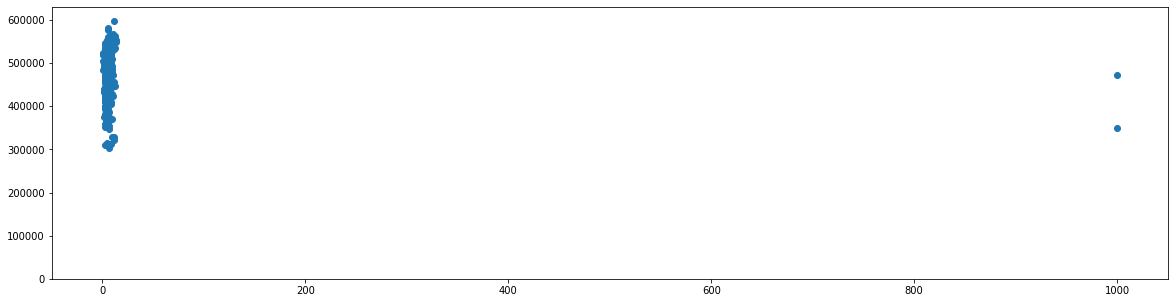

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2009.wdsp, df_2009.NUM_TRIPS)
plt.show()

It seems very similar:

**wdsp – Mean wind speed for the day in knots to tenths. Missing = 999.9.**

The main difference between the two is that **gust** seems to have a lot of data points that would be removed from the data but **wdsp** would only have one or two if we were to remove the outliers. I think, given we don't have much data, we will ignore **gust** and look at **wdsp** a bit more.

In [ ]:
print("Number of rows before wdsp outlier removed", df_2009["wdsp"].count())
df_2009 = df_2009[df_2009["wdsp"] < 100]
print("Number of rows after wdsp outlier removed", df_2009["wdsp"].count())

Number of rows before wdsp outlier removed 361
Number of rows after wdsp outlier removed 359


As you can see, we have only dropped two rows. Now, let's have a look at **wdsp** versus **NUM_TRIPS**:

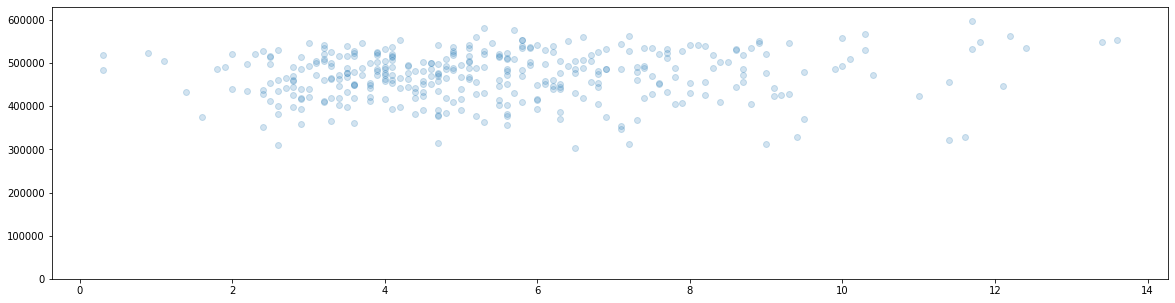

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2009.wdsp, df_2009.NUM_TRIPS, alpha=0.2)
plt.show()

That looks more like it. Let's check out the correlation matrix again:

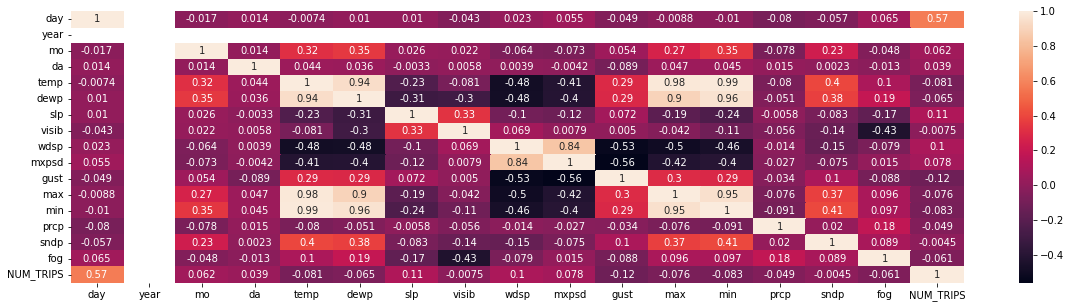

In [ ]:
corrMatrix = df_2009.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Not much change again here, with **days**, **slp** and **wdsp** being the best of a pretty bad bunch. **gust** doesn't count as the data is a mess. We can view all of the data in a similar matrix by plotting scatter plots.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 2009.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 2009.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 2009.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0492991950>,
      dtype=object)

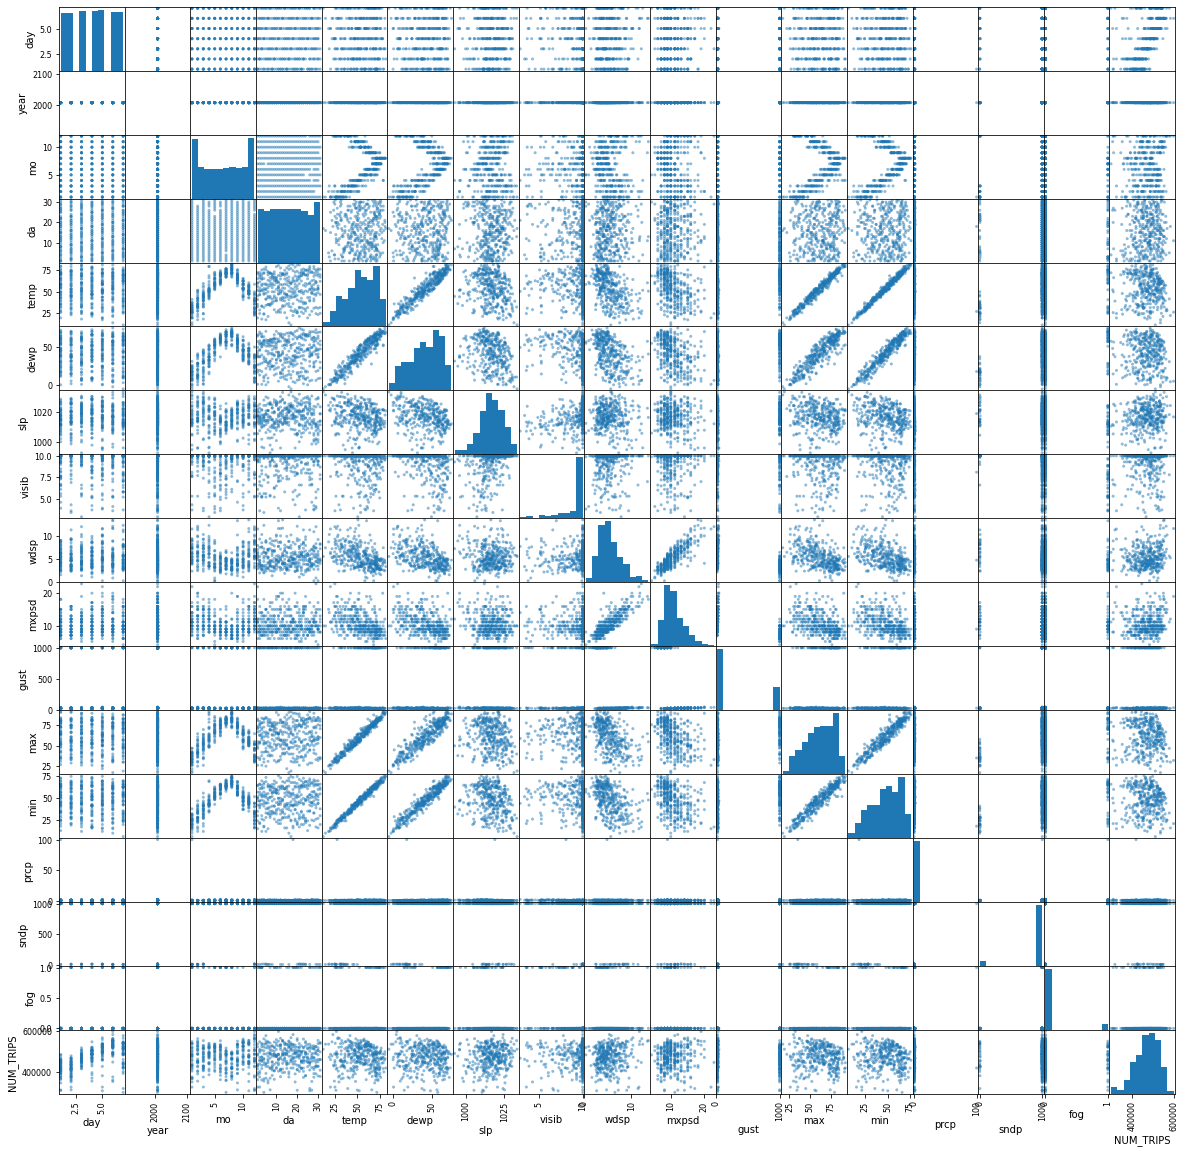

In [ ]:
plt.rcParams["figure.figsize"] = (20,20) # set size of plot again to make it big and square to make it visible.
pd.plotting.scatter_matrix(df_2009) # plot the scatter matrix

If you scroll to the bottom, you will see all of the plots. Pay most attention to the bottom row again. You can see **day** versus **NUM_TRIPS** on the bottom left. The rest don't look very linear.

Why don't we have a look at every day over the entire year and the **NUM_TRIPS**? It won't particularly make much sense at the moment as to why we are doing this but I just want to see if there are any interesting patterns.

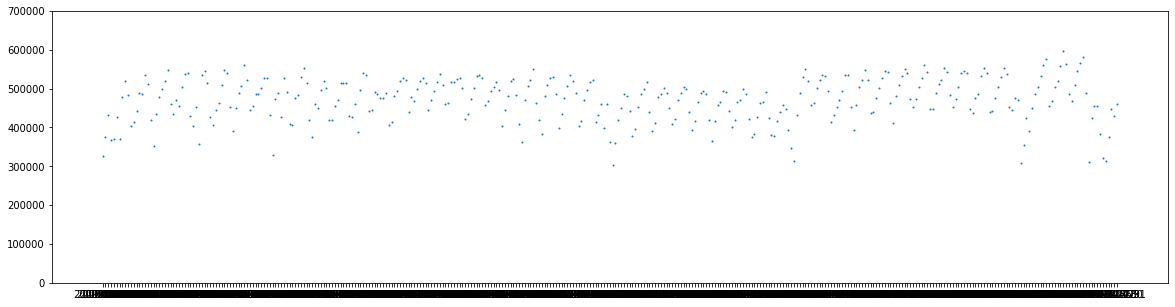

In [ ]:
plt.rcParams["figure.figsize"] = (20,5) # change the plot dimensions back
plt.ylim(0, 700000)
plt.scatter(df_2009.pickup_date, df_2009.NUM_TRIPS, s=1) # we use pickup_date as it is a unique string for every day of the year.
plt.show()

Not much to see here. Maybe a general rise at the start of the year, pretty well sustained, with a tail off later in the year (I guess over the summer) and then picking back up on the run into Christmas where at the end of December there is a drop off again.

Nothing much to be made of this now – just that it doesn't look clear from this that it will be easy to get any relationship at all. Let's try 2010 using similar processes.

In [ ]:
df_2010 = df_cleaned[df_cleaned["year"] == 2010]

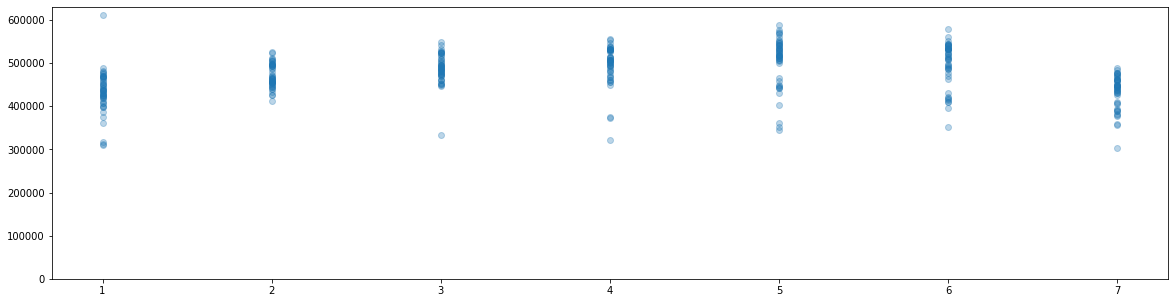

In [ ]:
# Make a scatter plot of day of the week versus the number of taxi trips
plt.ylim(0, 630000)
plt.scatter(df_2010.day, df_2010.NUM_TRIPS, alpha=0.3)
plt.show()

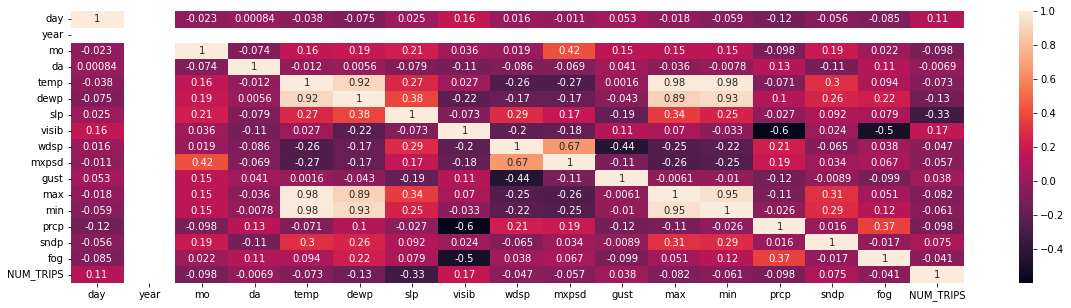

In [ ]:
corrMatrix = df_2010.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

When matched against **NUM_TRIPS** (bottom row) and **day**, **dewp** is similar to 2009  but **slp** appears to have a stronger negative linear relationship, which is the opposite of what we saw in 2009 (so we should investigate) and visibility (**visib**) seems to be reasonable.

Now, let's shift the days.

In [ ]:
df_2010.loc[df_2010['day'] > 0, 'day'] = df_2010['day']+1 # change all days by adding 1.
df_2010.loc[df_2010['day'] == 8, 'day'] = 1 # change days that equal 8 to day 1

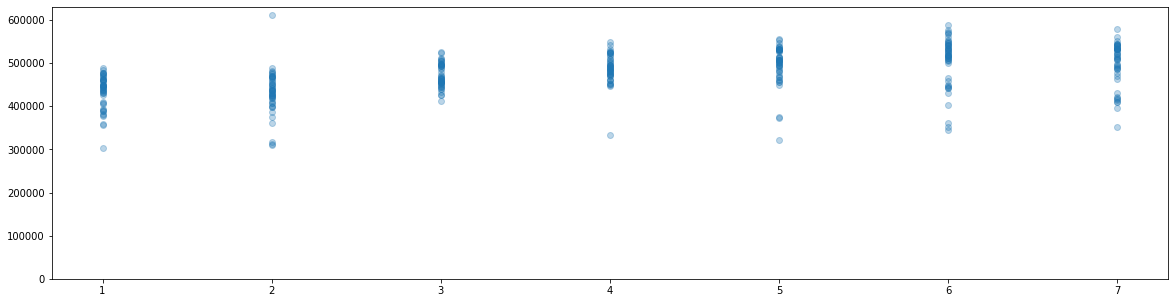

In [ ]:
# Make a scatter plot of day of the week versus the number of taxi trips
plt.ylim(0, 630000)
plt.scatter(df_2010.day, df_2010.NUM_TRIPS, alpha=0.3)
plt.show()

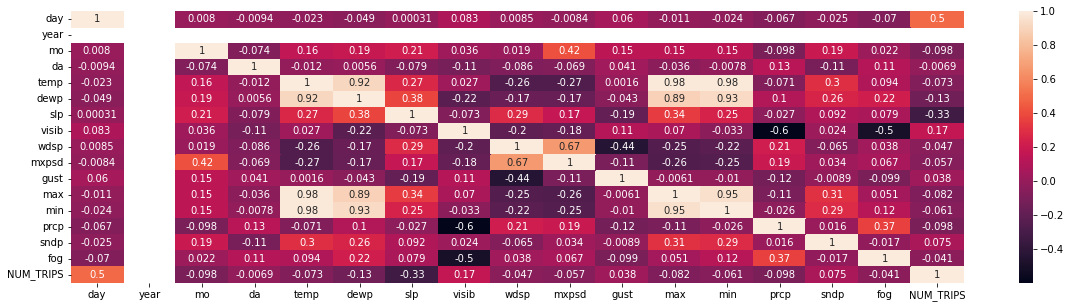

In [ ]:
corrMatrix = df_2010.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Once again, an impressive improvement when plotting **day** versus **NUM_TRIPS**. Let's see what is going on with **slp**.

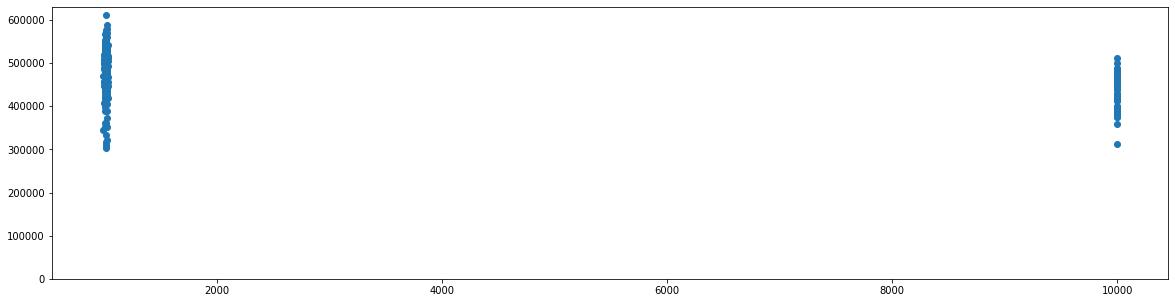

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2010.slp, df_2010.NUM_TRIPS)
plt.show()

Of course, it seemed too good to be true.

**slp – Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9.**

Again, the issue will be removing a lot of data points, so perhaps we will just ignore this for now. Let's have a look at **wdsp**.

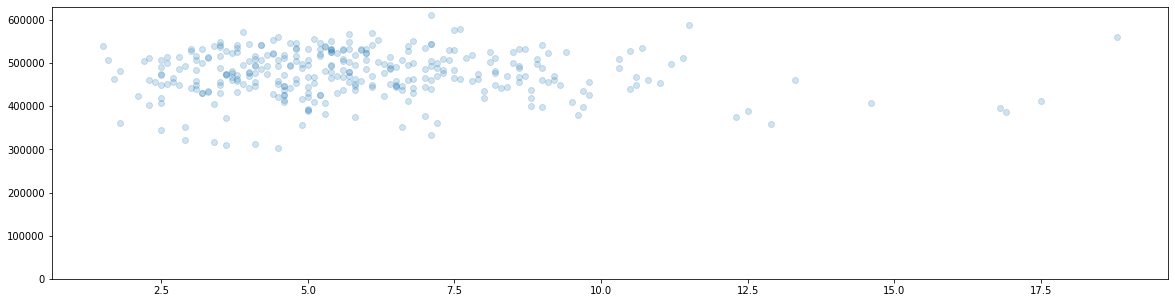

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2010.wdsp, df_2010.NUM_TRIPS, alpha=0.2)
plt.show()

This seems reasonable. But what about **visib** in 2010? This seems to be one of the better correlations with **NUM_TRIPS**.

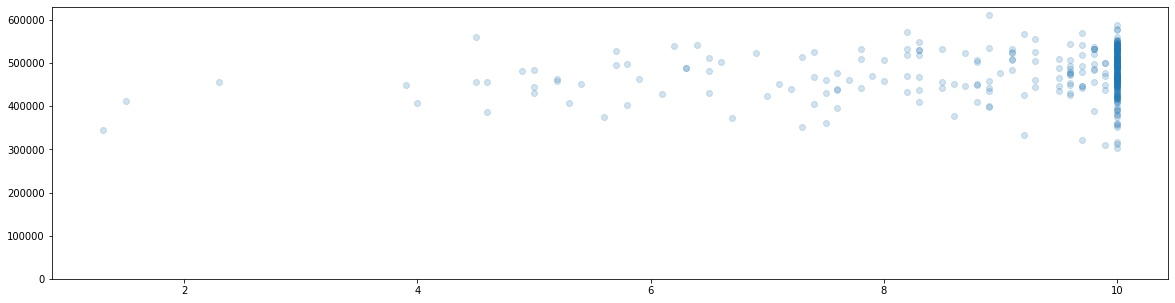

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2010.visib, df_2010.NUM_TRIPS, alpha=0.2)
plt.show()

This also seems reasonable. Lastly, let's check out **dewp**.

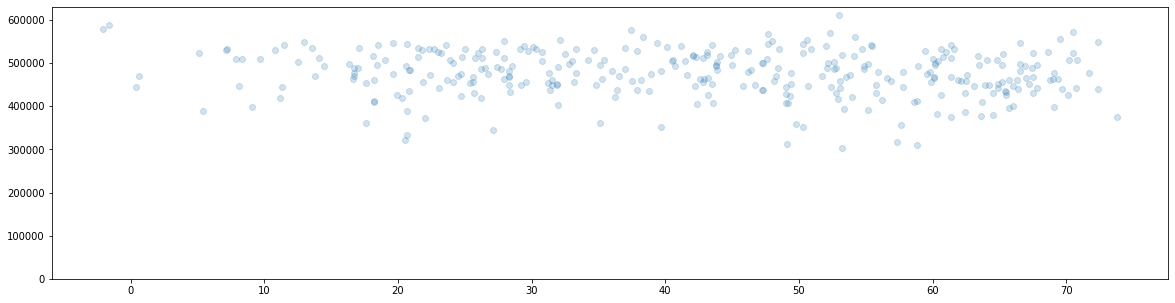

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2010.dewp, df_2010.NUM_TRIPS, alpha=0.2)
plt.show()

Let's keep a note of this for later. We haven't done any further cleaning of the data so let's have a look at each **day** of the year versus **NUM_TRIPS**.

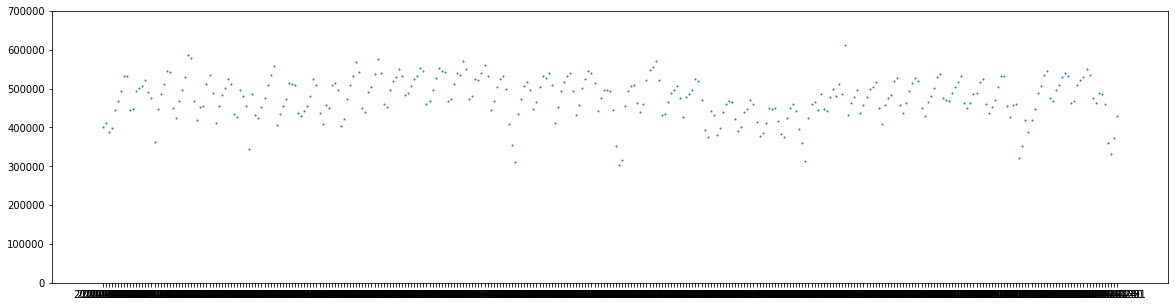

In [ ]:
plt.ylim(0, 700000)
plt.scatter(df_2010.pickup_date, df_2010.NUM_TRIPS, s=1)
plt.show()

That is interesting and looks to have a very similar pattern to 2009. Almost like there is a seasonal effect, with a slight dip in August and at the Christmas holidays.

Now for 2011.

In [ ]:
df_2011 = df_cleaned[df_cleaned["year"] == 2011]
df_2011.loc[df_2011['day'] > 0, 'day'] = df_2011['day']+1 # change all days by adding 1.
df_2011.loc[df_2011['day'] == 8, 'day'] = 1 # change days that equal 8 to day 1

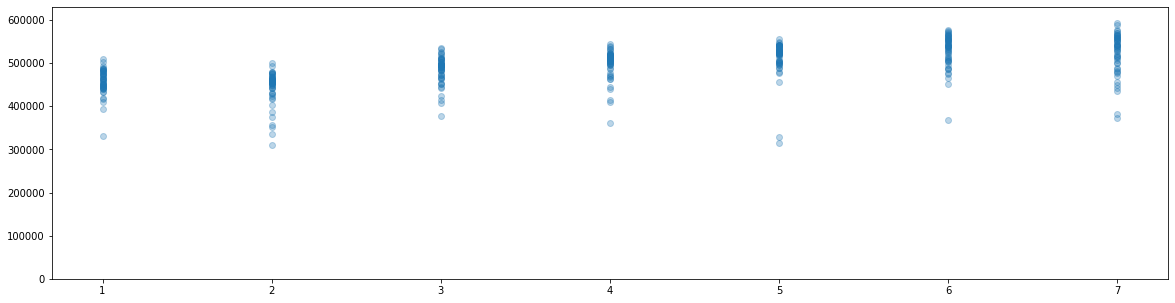

In [ ]:
# Make a scatter plot of day of the week versus the number of taxi trips
plt.ylim(0, 630000)
plt.scatter(df_2011.day, df_2011.NUM_TRIPS, alpha=0.3)
plt.show()

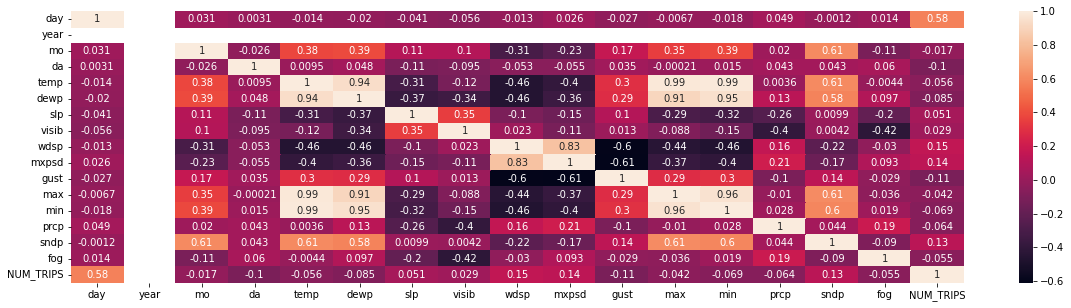

In [ ]:
corrMatrix = df_2011.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Since we know that the pattern for changing Sunday to the first day of the week gives a good positive correlation, I just did that step. **wdsp** also looks good. Let's have another look.

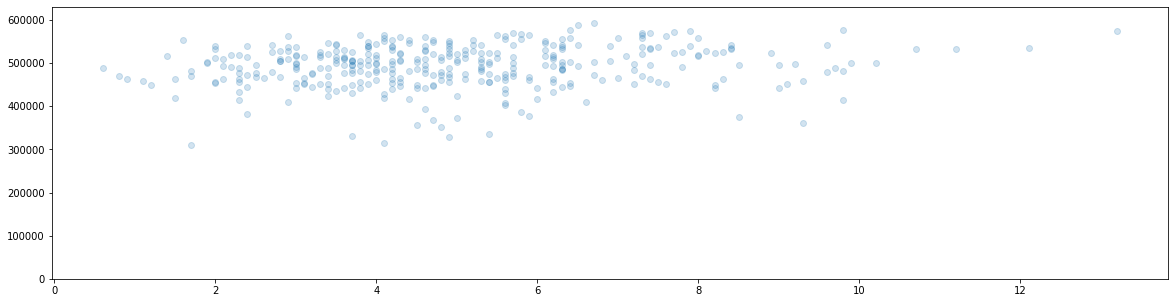

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_2011.wdsp, df_2011.NUM_TRIPS, alpha=0.2)
plt.show()

This looks good. Let's check out the pattern over the year again.

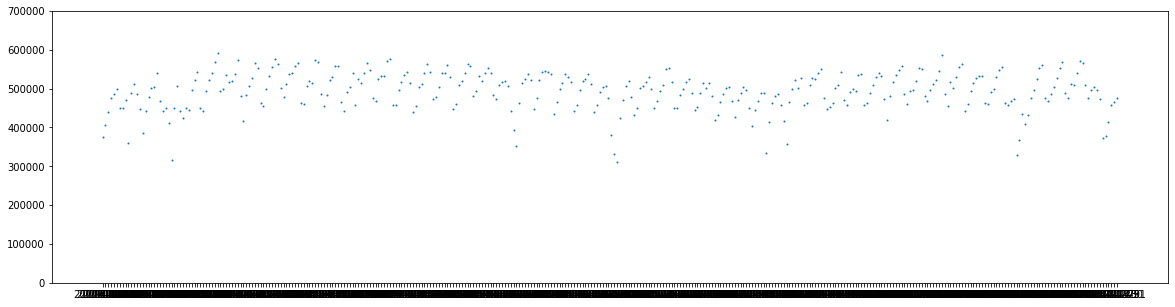

In [ ]:
plt.ylim(0, 700000)
plt.scatter(df_2011.pickup_date, df_2011.NUM_TRIPS, s=1)
plt.show()

**NOTE:**

Again, this looks very similar. Although you should definitely look into this in more depth (make sure by checking 2012 and so on) it is safe to assume that these patterns are very similar year-on-year.

We don't have much data (only 365 days in a year) so let's check we haven't messed up our data too much with all of our cleaning:

In [ ]:
df_2012 = df_cleaned[df_cleaned["year"] == 2012]
df_2013 = df_cleaned[df_cleaned["year"] == 2013]

In [ ]:
print('2009 ', df_2009['day'].count())
print('2010 ', df_2010['day'].count())
print('2011 ', df_2011['day'].count())
print('2012 ', df_2012['day'].count())
print('2013 ', df_2013['day'].count())

2009  359
2010  333
2011  354
2012  361
2013  360


Since there are only (normally) 365 days in a year, these numbers look reasonable. 2010 had a lot of problematic data, probably from human or processing errors. Now let's take a look at the data as a whole. First, we will need to create a new dataframe from all of the changes we have made to each individual year.

Remember to move Sunday to day 1 for 2012 and 2013.

In [ ]:
df_2012 = df_cleaned[df_cleaned["year"] == 2012]
df_2012.loc[df_2012['day'] > 0, 'day'] = df_2012['day']+1 # change all days by adding 1.
df_2012.loc[df_2012['day'] == 8, 'day'] = 1 # change days that equal 8 to day 1

In [ ]:
df_2013 = df_cleaned[df_cleaned["year"] == 2013]
df_2013.loc[df_2013['day'] > 0, 'day'] = df_2013['day']+1 # change all days by adding 1.
df_2013.loc[df_2013['day'] == 8, 'day'] = 1 # change days that equal 8 to day 1

In [ ]:
all_years = [df_2009, df_2010, df_2011, df_2012, df_2013]
df_final = pd.concat(all_years)
print(df_final["day"].count())

1767


That looks good. It's what we expected. Let's check the dataframe.

In [ ]:
df_final.head()

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
74,5,2009,1,1,2009-01-01,19.6,1.0,1020.6,10.0,11.6,22.0,32.1,26.1,15.1,0.04,999.9,0,327625
100,6,2009,1,2,2009-01-02,28.7,13.1,1017.5,9.3,5.6,14.0,19.0,33.1,21.9,0.00,999.9,0,376708
37,7,2009,1,3,2009-01-03,33.5,17.7,1012.6,10.0,7.7,13.0,20.0,37.9,30.0,0.00,999.9,0,432710
24,1,2009,1,4,2009-01-04,31.7,11.3,1018.1,10.0,7.3,12.0,17.1,42.1,25.0,0.00,999.9,0,367525
78,2,2009,1,5,2009-01-05,41.1,21.7,1014.3,10.0,6.3,9.9,14.0,43.0,37.9,0.00,999.9,0,370901


Looks great! Now, the next thing I want to do is check out every **day** of the year versus **NUM_TRIPS** for all years.

We saw that there was a similar pattern year-on-year so let's check it out. This one takes a while to process.

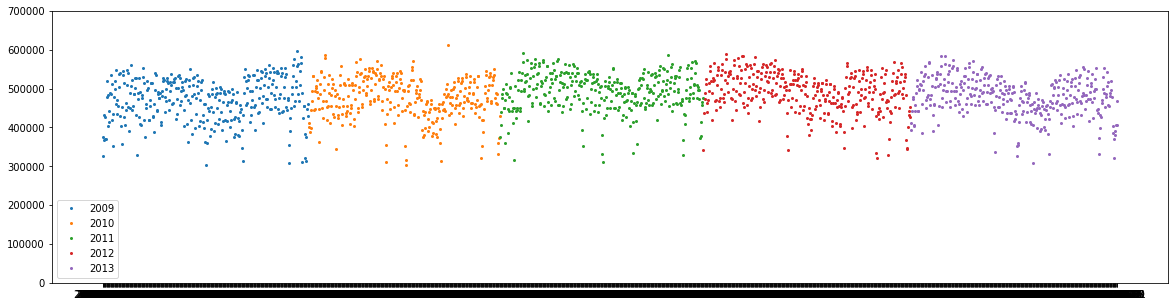

In [ ]:
groups = df_final.groupby('year') # We group by year as we want to create a legend and make the visualisation clearer using colour.
plt.ylim(0, 700000)
for name, group in groups:
    plt.plot(group.pickup_date, group.NUM_TRIPS, marker='o', linestyle='', markersize=2, label=name)

plt.legend()

What an interesting plot. It appears that there is a seasonal pattern. 2010 has some issues due to data processing or collection problems but generally the pattern year-on-year is the same or very similar.

We have to be a little wary that there could be increases or decreases generally year-on-year. We can check this.



In [ ]:
print("2009", df_2009.NUM_TRIPS.max(), df_2009.NUM_TRIPS.min())
print("2010", df_2010.NUM_TRIPS.max(), df_2010.NUM_TRIPS.min())
print("2011", df_2011.NUM_TRIPS.max(), df_2011.NUM_TRIPS.min())
print("2012", df_2012.NUM_TRIPS.max(), df_2012.NUM_TRIPS.min())
print("2013", df_2013.NUM_TRIPS.max(), df_2013.NUM_TRIPS.min())

2009 596882 302128
2010 611543 303313
2011 592896 310280
2012 589609 321535
2013 584812 307260


It seems fairly stable.

Let's create a new column in our dataframe based on our unique **pickup_dates** and remove the years. This way, we can overlay the data on top of one another.

In [ ]:
df_final['pickup_date_no_year'] = df_final['pickup_date'] # create a new column with values the same as pickup_date

In [ ]:
# remove year from the string for 2009 - 2013
df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2009-','')
df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2010-','')
df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2011-','')
df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2012-','')
df_final['pickup_date_no_year'] = df_final['pickup_date_no_year'].str.replace('2013-','')

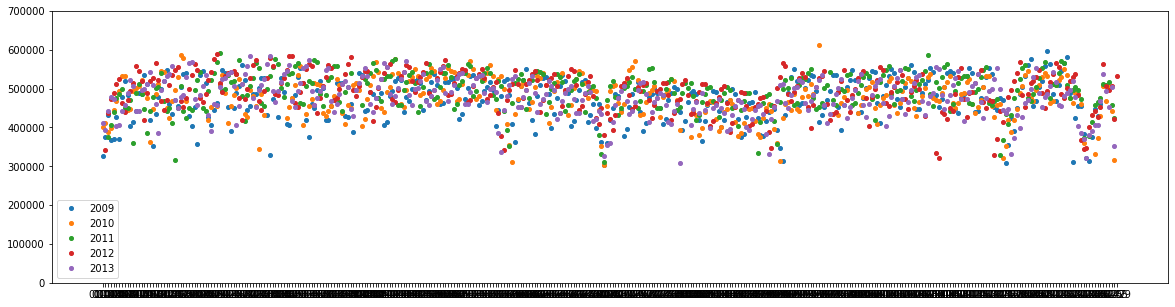

In [ ]:
groups = df_final.groupby('year') # We group by year as we want to create a legend and make the visualisation clearer using colour.
plt.ylim(0, 700000)
for name, group in groups:
    plt.plot(group.pickup_date_no_year, group.NUM_TRIPS, marker='o', linestyle='', markersize=4, label=name)

plt.legend()

There may be some annual variation although it isn't easy to tell. It's remarkable how similar the patterns are year-on-year. To handle data where there is an increase year-on-year, we should look to normalise or standardise the output. It may not be needed in this case but it may be in other cases. We will deal with this later, but for now let's have a little look our output: **NUM_TRIPS**.

(array([ 28.,  48., 115., 316., 494., 490., 252.,  24.]),
 array([302128.   , 340804.875, 379481.75 , 418158.625, 456835.5  ,
        495512.375, 534189.25 , 572866.125, 611543.   ]),
 <a list of 8 Patch objects>)

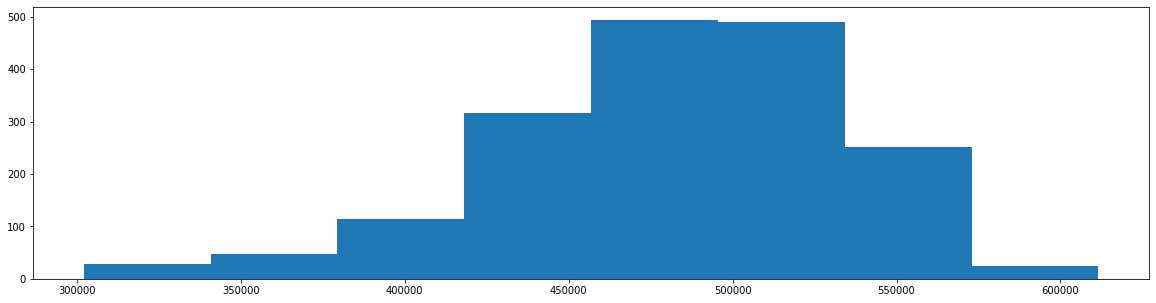

In [ ]:
plt.hist(df_final['NUM_TRIPS'], bins=8)

In our simple histogram we can see that the output (NUM_TRIPS) has a distribution that is slightly skewed. We can deal with normalisation later. For now, let's keep things simple and look at the data over all years in a correlation matrix.

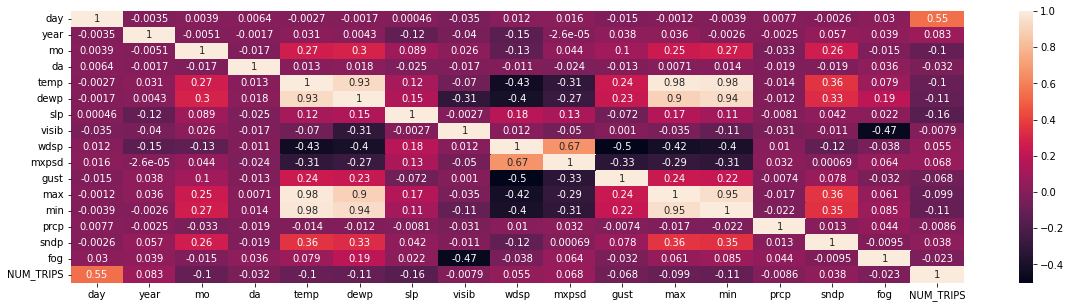

In [ ]:
corrMatrix = df_final.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

It is clear that **day** of the week and **NUM_TRIPS** will be useful in predicting the number of taxi trips on a given day. Given the earlier problems we had with **slp** and **wdsp** being close to 0 correlation, we will use **temp** in our linear regression model, even though it has a weak negative linear relationship.

I am going to make a new dataframe called **df_final_linear** here as we will revisit it in the next module.

That gives us **df_final_linear** and **df_final** for working with our regression models. Both of these datasets will have to be altered and we will go over that in the next module.

In [ ]:
df_final_linear = df_final

## Module 4: Regression models.

**You can look at an [example of basic regression on Tensorflow](https://www.tensorflow.org/tutorials/keras/regression) before you start.**

In this module we will be going through the final stages of building testable models. This will still involve some investigation, further data preparation, analysis and visualisations. However, the main goal is to create our models for predicting the number of taxi trips on any given day.

In the last module, we decided that day of the week and temperature were the only two inputs that we would use for the linear regression model. We also noticed a seasonal and possible annual pattern in the data which should be helpful for the Deep Neural Network (DNN) regression model.

The first thing we must do is import Tensorflow.


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


Normally, this would be restricted to engineers or scientists but it powers awesome tools that are a bit more user-friendly and accessible.

Tensorflow is the core open source library to help you develop and train Machine Learning (ML) models and it is easy to get started quickly by running Colab notebooks (which is what we are doing).

There are some [cool tutorials on Tensorflow](https://www.tensorflow.org/overview) if you want to learn more, however, they are not for the faint-hearted.

We have our dataframe and we will work on the linear regression model first. Something we should have done above was to handle missing data using Pandas but we can check here.

In [ ]:
df_final_linear.isna().sum()

day                    0
year                   0
mo                     0
da                     0
pickup_date            0
temp                   0
dewp                   0
slp                    0
visib                  0
wdsp                   0
mxpsd                  0
gust                   0
max                    0
min                    0
prcp                   0
sndp                   0
fog                    0
NUM_TRIPS              0
pickup_date_no_year    0
dtype: int64

The **isna()** method checks for missing data values and the **sum ()** method totals them up. As you can see we are good to go for all values. If there were some nulls or missing data, we could (and should) simply get rid of them using this command:



In [ ]:
df_final_linear = df_final_linear.dropna()

The first thing I would like to do is make a very simple model with just one single input (days) and one output (NUM_TRIPS). So, let's create a dataframe.

In [ ]:
one_input_data = [df_final["day"], df_final["NUM_TRIPS"]] # create an array of all values for day and all values for NUM_TRIPS in two columns
headers = ["day", "NUM_TRIPS"] # declare the titles of our input and output. As you can see day is first and NUM_TRIPS is second and they correspond to the line above
df_one_input = pd.concat(one_input_data, axis=1, keys=headers) # Bring these two arrays together to make a new dataframe
df_one_input.head()

,day,NUM_TRIPS
74,5,327625
100,6,376708
37,7,432710
24,1,367525
78,2,370901


Perfect, a simple dataframe with only one input and one output.

Now, in order to train our model, we need to split this data into a training set and a test set. Don't worry, this just means that a proportion of the data (most of it) is separated for training and the rest is separated for testing how well the model has performed.

In our case we want the training set to be 80% of the total data and as you can see below **frac** is set to 0.8 which is equivalent to 80% in decimal form.

In [ ]:
train_dataset = df_one_input.sample(frac=0.8, random_state=0)
test_dataset = df_one_input.drop(train_dataset.index)

Great, now let's check everything is in order for the training set.

In [ ]:
train_dataset.describe()

,day,NUM_TRIPS
count,1414.000000,1414.000000
mean,4.048798,481763.621641
std,1.987867,52380.069726
min,1.000000,303313.000000
25%,2.000000,452027.750000
50%,4.000000,487100.000000
75%,6.000000,521180.500000
max,7.000000,611543.000000


Perfect, now the test dataset.

In [ ]:
test_dataset.describe()

,day,NUM_TRIPS
count,353.000000,353.000000
mean,3.881020,482568.150142
std,1.996448,50353.623421
min,1.000000,302128.000000
25%,2.000000,450004.000000
50%,4.000000,485706.000000
75%,6.000000,518681.000000
max,7.000000,587602.000000


Excellent, as you can see the count of rows is less in the test dataset than it is in the training dataset.

Next, we want to separate the target value (this is the 'label', in this case **NUM_TRIPS**) from the features (in this case **days**).

This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_TRIPS')
test_labels = test_features.pop('NUM_TRIPS')

As mentioned in the last section, we would normally want to normalise our inputs (features). It is good practice to normalise features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. Therefore the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

The model may converge without feature normalisation but normalising makes training much more stable. In simple terms, we want our model to train well and doing this helps.

The first thing we will have to do is scale our output (normalising is something we will do using out-the-box functions in TensorFlow). This is simply because they are very large. A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, which would make the learning process unstable.

In our case, scaling the outputs just allows the model to train more quickly (or at all). As we just want to test something without knowing all the details about building ML models, let's jump to it.

Let's take a scale factor that brings the number of taxi trips into a decimal lower than 1 and greater than 0.

In [ ]:
scale_factor = 1000000

The number of taxi trips on any given day is in the hundreds of thousands; anywhere between approximately 300,000 and 800,000 trips.

We can apply this to our labels (our outputs) by simply dividing **train_labels** and **test_labels** by the **scale_factor**.

In [ ]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

Now let's have a look at the labels. We will just use the training set. As you can see, the values are now decimals. For example, 497454/1000000 = 0.497454. The values on the left are indexes from the dataframe.

In [ ]:
print(train_labels)

687     0.497454
417     0.505003
434     0.475205
1378    0.539301
564     0.524355
          ...   
1740    0.503978
63      0.457471
595     0.529447
1246    0.450430
737     0.409350
Name: NUM_TRIPS, Length: 1414, dtype: float64


You should get numbers a bit like this:

0.497454
0.505003
0.475205
0.539301
0.524355

Now, the next stage should be treated as simply boilerplate but I will add some narrative. You will see however that we can simply copy and paste this code and, with minor errors, spin up models quickly.

Here is our process for linear regression with one input value (day) and one output value (NUM_TRIPS).

Training a model with **tf.keras** typically starts by defining the model architecture. We will use a **tf.keras.Sequential model** which represents a sequence of steps.

There are two steps in your single-variable linear regression model:



*   Normalise the 'day' input features using the **tf.keras.layers.Normalization** preprocessing layer.
*   Apply a linear transformation (y = mx + c) to produce one output using a linear layer (**tf.keras.layers.Dense**).  


The number of inputs can either be set by the **input_shape** argument, or automatically when the model is run for the first time.

First, we create a NumPy array made of the 'day' features. Then, instantiate the **tf.keras.layers.Normalization** and fit its state to the **day** data.

I mentioned earlier that we want to normalise our features (the input variables).

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[3]]

Normalized: [[-0.53]]


This code simply creates the normalisation layer and fits its state to the **day** data.

The first value is simply to show the original versus the normalised value. As you can see, the first example is 3 but normalised gives -0.53.

Let's create a specific day normalisation layer using effectively the same code. Have a look at the difference.



In [ ]:
day = np.array(train_features['day'])

day_normalizer = layers.Normalization(input_shape=[1,], axis=None)
day_normalizer.adapt(day)

Now we are going to create a model for our single input (day) that will have a normalisation layer with one input and one output and also a single dense output layer with one input and one output.

In [ ]:
day_model = tf.keras.Sequential([
    day_normalizer,
    layers.Dense(units=1)
])
day_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict 'NUM_TRIPS' from 'day'.

Just to make sure everything is all in order, let's run the untrained model on the first 10 'day' values. The output won't be good but notice that it has the expected shape of (10, 1). This is what we would expect: 10 rows and 10 single outputs back.

Remember, we haven't done anything yet. But look at how we test, we use the **predict** method and insert our inputs (our labels).


In [ ]:
day_model.predict(day[:10])

array([[ 0.86021054],
       [-0.7801641 ],
       [ 0.04002318],
       [-1.6003515 ],
       [ 0.86021054],
       [-1.6003515 ],
       [ 0.86021054],
       [ 1.6803979 ],
       [ 0.86021054],
       [-0.7801641 ]], dtype=float32)

As we expected, nonsensical values with negative outputs. Don't worry, we will train it soon.

Once the model is built we will configure the training procedure using the Keras **Model.compile** method. The most important arguments to compile are the **loss** and the **optimizer**, since these define what will be optimised (**mean_absolute_error**) and how (using **tf.keras.optimizers.Adam**).

The meaning of these things isn't required knowledge at this point. Just know that you have to apply them.

In [ ]:
day_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Next we will use Keras **model.fit** to execute the training for 100 epochs.

The number of epochs is a hyperparameter that defines the number of times that the learning algorithm will run through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. It isn't really something we deal with here as in our case an epoch has one batch.

This means that in the following example the model will run through the entire dataset 100 times, refining each time.

As you can see, we add **features**, 'day' and our labels from the training datasets. You can ignore **logging** (verbose) and **validation_split**, although it can be explained as the following:

**validation_split**: The model will set apart this fraction of the training data, will not train on it and will evaluate the loss and any model metrics against this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided before shuffling.

In [ ]:
%%time
history = day_model.fit(
    train_features['day'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 8.85 s, sys: 536 ms, total: 9.38 s
Wall time: 8.53 s


Once this has completed, we can have a look at the details of each epoch: loss, validation loss and which epoch. We want to minimise the loss which appears to be happening here.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.034816,0.036536,95
96,0.033669,0.036103,96
97,0.032664,0.034499,97
98,0.034445,0.037207,98
99,0.038452,0.036509,99


We can plot the **loss** and **validation loss** over the number of epochs.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [NUM_TRIPS]')
  plt.legend()
  plt.grid(True)

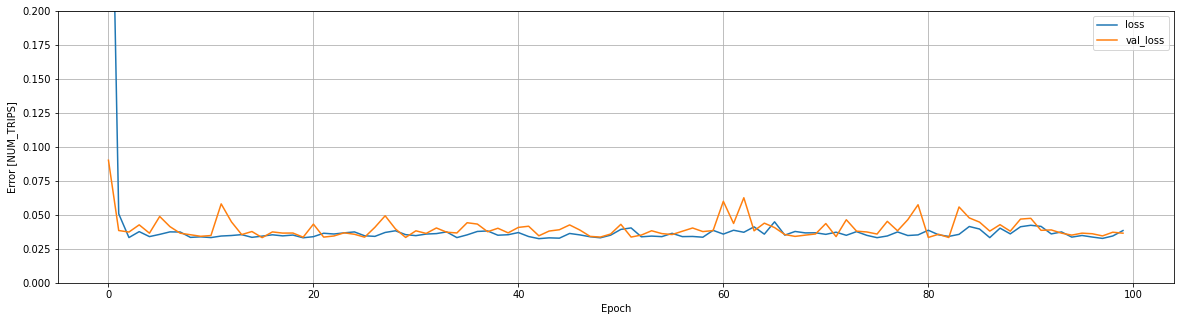

In [ ]:
plot_loss(history)

Simply put, a 'loss' function quantifies how 'good' or 'bad' a given predictor is at classifying the input data points in a dataset.

The smaller the loss, the better a job the classifier is doing at modelling the relationship between the input data and the output targets.

That said, there is a point where we can overfit our model — by modelling the training data too closely, our model loses the ability to generalise.

We therefore seek to:

* Drive our loss down, which will improve our model accuracy.
* Achieve the above as quickly as possible and with as few hyperparameter updates or experiments as possible.
* Do all of this without overfitting our network and modelling the training data too closely.

It’s a balancing act and our choice of loss function and model optimiser can dramatically impact the quality, accuracy and generalisability of our final model.

Typical loss functions include:


*   Binary cross-entropy.
*   Categorical cross-entropy.
*   Sparse categorical cross-entropy.
*   Mean Squared Error (MSE).
*   **Mean Absolute Error (MAE)**.

In the plot above, the loss reduces quickly and stabilises, with the validation loss being close and stable to the loss. The gap between training and validation accuracy is a clear indication of overfitting. The larger the gap, the higher the overfitting.

Now let's use our test data and get some predictions.

In [ ]:
test_results = {}

test_results['day_model'] = day_model.evaluate(
    test_features['day'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(1, 7, 8)
y = day_model.predict(x)

Now we will plot the predictions from the test data in the same plot as the training day data.

In [ ]:
def plot_day(x, y):
  plt.scatter(train_features['day'], train_labels, label='Data', alpha=0.3)
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('day')
  plt.ylim([0.2, 0.8])
  plt.ylabel('NUM_TRIPS')
  plt.legend()

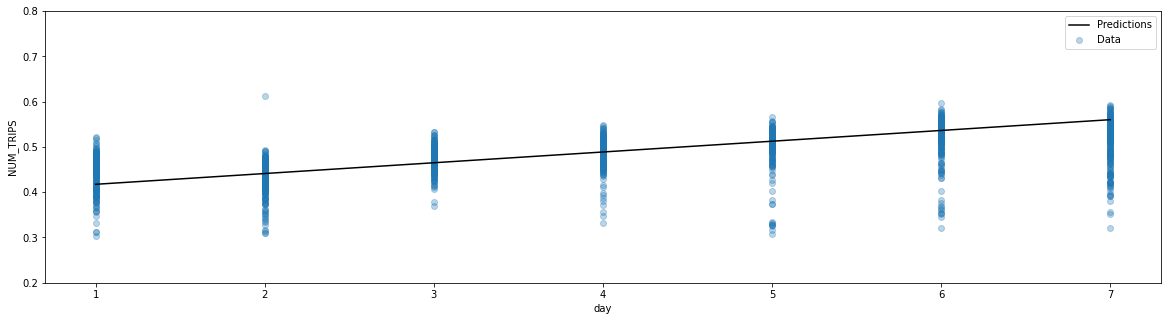

In [ ]:
plot_day(x, y)

**Initial conclusions**

This actually looks pretty good with the predictions being at the midpoint of the most dense regions of **NUM_TRIPS** on a particular day, except perhaps on a Saturday, with Friday also being questionable in terms of accuracy.

Let's see what happens when we have multiple inputs. In our case, only two: **day** and **temp**.


Let's try a linear regression model with **temp** and **day** of the week.

As you can see, we start the same way by creating a dataframe, but this time we have **day**, **temp** and **NUM_TRIPS**.

In [ ]:
many_input_data = [df_final["day"], df_final["temp"], df_final["NUM_TRIPS"]] # create an array of all values for day and all values for NUM_TRIPS in two columns
headers = ["day", "temp", "NUM_TRIPS"] # declare the titles of our input and output. As you can see day is first and NUM_TRIPS is second and these correspond to the line above
df_many_input = pd.concat(many_input_data, axis=1, keys=headers) # Bring these two arrays together to make a new dataframe
df_many_input.head()

,day,temp,NUM_TRIPS
74,5,19.6,327625
100,6,28.7,376708
37,7,33.5,432710
24,1,31.7,367525
78,2,41.1,370901


Then we split into training and test sets.

In [ ]:
train_dataset = df_many_input.sample(frac=0.8, random_state=0)
test_dataset = df_many_input.drop(train_dataset.index)

Next we split these into features and labels.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_TRIPS')
test_labels = test_features.pop('NUM_TRIPS')

Finally we check our features: **day** and **temp**.

In [ ]:
train_features.head()

,day,temp
687,3,56.9
417,5,35.7
434,4,50.9
1378,6,56.9
564,3,61.2


All looking good. Now, let's scale down the outputs.

In [ ]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

Make a normalisation layer and test the normalisation of the first row of inputs.

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 3.  56.9]]

Normalized: [[-0.53  0.08]]


Now we set up the structure of our model using the **normalizer** and **Dense** layer as before.

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

Then we check our predictions on the untrained model.

In [ ]:
linear_model.predict(train_features[:10])

array([[ 0.41160777],
       [ 0.03719826],
       [ 0.12297452],
       [-0.8511859 ],
       [ 0.31679422],
       [-0.61966443],
       [ 0.4557071 ],
       [ 0.77079993],
       [ 0.34325385],
       [-0.4126149 ]], dtype=float32)

It's nonsense but everything works in that we have two inputs per row and one output corresponding; **NUM_TRIPS**.

You can see the shape of the layers is (2, 1). When you run the model, its weight matrices will be built — check that the kernel weights (the m in y = mx + c) have a shape of (2, 1), or however many inputs you have.

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.8364595 ],
       [-0.36406314]], dtype=float32)>

Perfect. Everything is looking good.

Use the same **optimizer** and **loss** as before.

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Do the same again for training over 100 epochs but this time use **day** and **temp**, rather than just **day**.

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 8.56 s, sys: 505 ms, total: 9.06 s
Wall time: 8.23 s


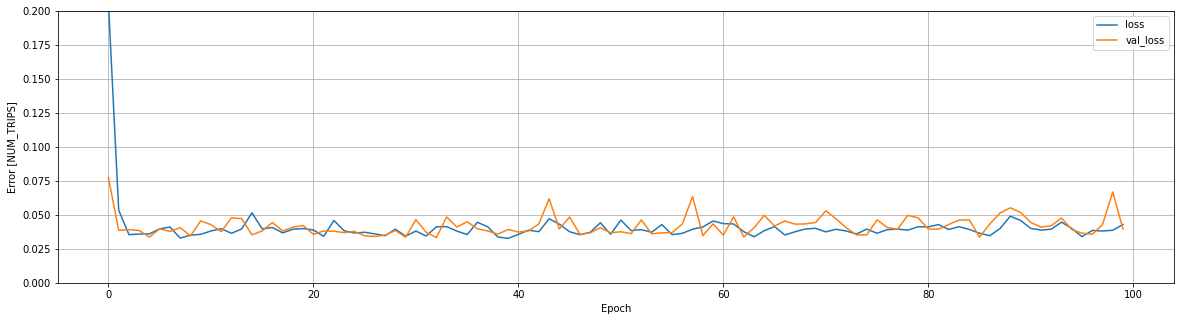

In [ ]:
plot_loss(history)

This looks pretty similar. Everything is going well.

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

For now we are not going to analyse this further. We will do that after the DNN model. But we can check the **MAE** for **NUM_TRIPS** of both models.

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_TRIPS]']).T

,Mean absolute error [NUM_TRIPS]
day_model,0.031513
linear_model,0.035532


It looks as though the day model outperforms the linear model with an **MAE**, which makes a lot of sense given how low the linear correlation is for **temp** versus **NUM_TRIPS**.

**DNN regression**

So far you have implemented two linear models: one that has a single input  and one that has multiple inputs.

In this section you will create a multiple-input DNN model.

The code is effectively the same except the model is expanded to include some 'hidden' non-linear layers. The name 'hidden' here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalisation layer.
* Two hidden, non-linear, **Dense** layers with the **ReLU** (relu) activation function nonlinearity.
* A linear **Dense** single output layer.

Both models will use the same training procedure so the compile method is included in **the build_and_compile_model** function below.

Before we go any further, let's think back to our first explorations into the data. We noted that the data had a similar pattern year-on-year with the possibility that there was some annual variance.

If only there was some way to easily cut the data into blocks. Thankfully there is: months. But let's not jump in with both feet, let's add some marker lines as a visual aid to separate by months.

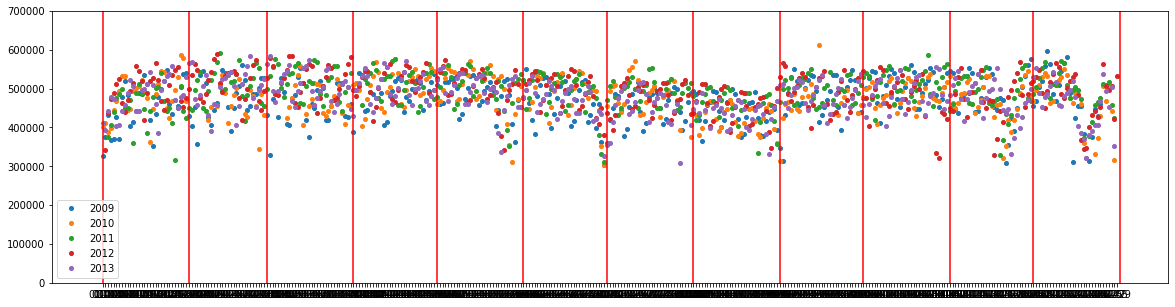

In [ ]:
groups = df_final.groupby('year') # We group by year as we want to create a legend and make the visualisation clearer using colour.
fig, ax = plt.subplots();
plt.ylim(0, 700000)
for name, group in groups:
    plt.plot(group.pickup_date_no_year, group.NUM_TRIPS, marker='o', linestyle='', markersize=4, label=name)

plt.legend()
ax.axvline(x=0, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=31, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=59, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=90, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=120, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=151, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=181, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=212, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=243, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=273, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=304, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=334, ymin=0.0, ymax=1.0, color='r')
ax.axvline(x=365, ymin=0.0, ymax=1.0, color='r')

With months segmenting the data, it is likely that there will be more rich information available if the model could use the month and learn from it. Let's look at March, for example:

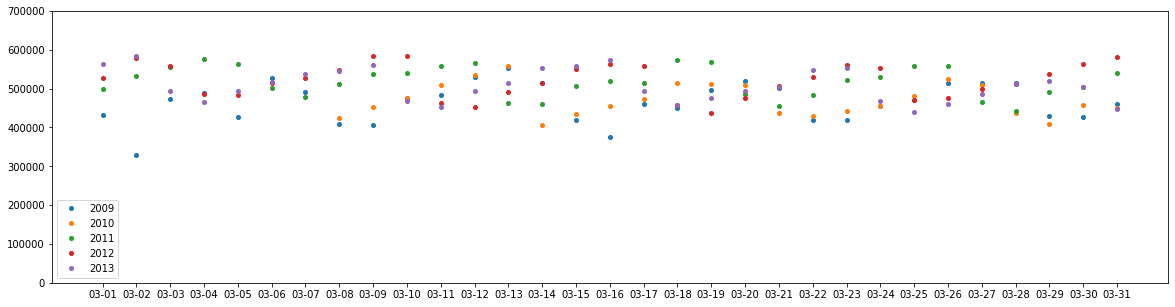

In [ ]:
df_final_march = df_final[df_final["mo"] == 3]
groups = df_final_march.groupby('year') # We group by year as we want to create a legend and make the visualisation clearer using colour.
plt.ylim(0, 700000)
for name, group in groups:
    plt.plot(group.pickup_date_no_year, group.NUM_TRIPS, marker='o', linestyle='', markersize=4, label=name)

plt.legend()

What we notice is that the variation is reduced between the lowest and the highest values. If we view this data as a scatter plot between **day** of the week and **NUM_TRIPS** we can see that the pattern is consistent, but again, the **NUM_TRIPS** values are less spread out.

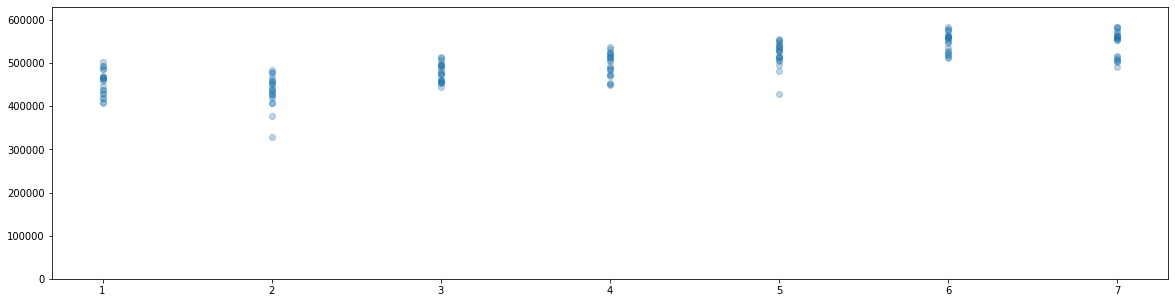

In [ ]:
plt.ylim(0, 630000)
plt.scatter(df_final_march.day, df_final_march.NUM_TRIPS, alpha=0.3)
plt.show()

Let's check the correlation matrix.

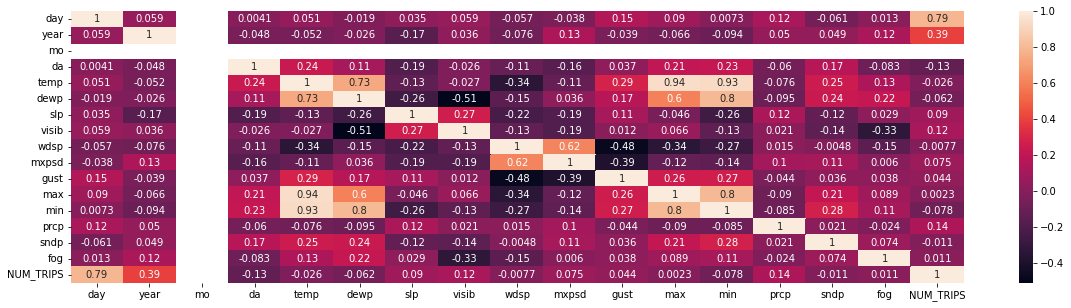

In [ ]:
corrMatrix = df_final_march.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

This is great! **Day** of the week versus **NUM_TRIPS** almost has a very strong positive correlation. It looks like this could definitely improve our model. March, April, June and October showed the best results in this respect, but either way, let's fix our data.

We first want to apply One-Hot Encoding to our category data. In our example this means **day** of the week and months (**mo**).

In [ ]:
df_final.head()

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS,pickup_date_no_year
74,5,2009,1,1,2009-01-01,19.6,1.0,1020.6,10.0,11.6,22.0,32.1,26.1,15.1,0.04,999.9,0,327625,01-01
100,6,2009,1,2,2009-01-02,28.7,13.1,1017.5,9.3,5.6,14.0,19.0,33.1,21.9,0.00,999.9,0,376708,01-02
37,7,2009,1,3,2009-01-03,33.5,17.7,1012.6,10.0,7.7,13.0,20.0,37.9,30.0,0.00,999.9,0,432710,01-03
24,1,2009,1,4,2009-01-04,31.7,11.3,1018.1,10.0,7.3,12.0,17.1,42.1,25.0,0.00,999.9,0,367525,01-04
78,2,2009,1,5,2009-01-05,41.1,21.7,1014.3,10.0,6.3,9.9,14.0,43.0,37.9,0.00,999.9,0,370901,01-05


The first thing we will do is One-Hot Encode day of the week.

In [ ]:
# One-Hot Encoding for day
df_final['day'] = df_final['day'].map({ 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})
df_final = pd.get_dummies(df_final, columns=['day'], prefix='', prefix_sep='')

Then we One-Hot Encode month.

In [ ]:
# One-Hot Encoding for month
df_final['mo'] = df_final['mo'].map({ 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df_final = pd.get_dummies(df_final, columns=['mo'], prefix='', prefix_sep='')


Now, let's check out the data. As you can see below, **day** and **mo** have disappeared from the dataframe (**df_final**) and are replaced by some new columns at the far right of the table. You can see that if it is a Friday, there will be a 1 in Friday but 0s in the rest of the days.

For our categorical variables we had integer categories, and although this seems fine, no ordinal relationship exists. As such the network will infer that 12 is more important than 1, for example. This is why the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

To remedy this, One-Hot Encoding can be applied to the integer representation. Let's see what our data looks like now.

In [ ]:
df_final.head()

,year,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS,pickup_date_no_year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
74,2009,1,2009-01-01,19.6,1.0,1020.6,10.0,11.6,22.0,32.1,26.1,15.1,0.04,999.9,0,327625,01-01,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
100,2009,2,2009-01-02,28.7,13.1,1017.5,9.3,5.6,14.0,19.0,33.1,21.9,0.00,999.9,0,376708,01-02,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
37,2009,3,2009-01-03,33.5,17.7,1012.6,10.0,7.7,13.0,20.0,37.9,30.0,0.00,999.9,0,432710,01-03,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
24,2009,4,2009-01-04,31.7,11.3,1018.1,10.0,7.3,12.0,17.1,42.1,25.0,0.00,999.9,0,367525,01-04,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
78,2009,5,2009-01-05,41.1,21.7,1014.3,10.0,6.3,9.9,14.0,43.0,37.9,0.00,999.9,0,370901,01-05,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


OK, great. Now it is time to go through our process again. Let's get all of the input values we want and our target value (NUM_TRIPS) and put them in a new dataframe.

In [ ]:
dnn_many_input_data = [df_final["year"], df_final["temp"], df_final["dewp"], df_final["slp"], df_final["visib"], df_final["wdsp"], df_final["gust"], df_final["prcp"], df_final["sndp"], df_final["fog"], df_final["Sunday"], df_final["Monday"], df_final["Tuesday"], df_final["Wednesday"], df_final["Thursday"], df_final["Friday"], df_final["Saturday"], df_final["January"], df_final["February"], df_final["March"], df_final["April"], df_final["May"], df_final["June"], df_final["July"], df_final["August"], df_final["September"], df_final["October"], df_final["November"], df_final["December"], df_final["NUM_TRIPS"]]
headers = ["year","temp","dewp","slp","visib","wdsp","gust","prcp","sndp","fog","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","January","February","March","April","May","June","July","August","September","October","November","December","NUM_TRIPS"]
df_dnn_many_input = pd.concat(dnn_many_input_data, axis=1, keys=headers)
df_dnn_many_input.head()

,year,temp,dewp,slp,visib,wdsp,gust,prcp,sndp,fog,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,January,February,March,April,May,June,July,August,September,October,November,December,NUM_TRIPS
74,2009,19.6,1.0,1020.6,10.0,11.6,32.1,0.04,999.9,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,327625
100,2009,28.7,13.1,1017.5,9.3,5.6,19.0,0.00,999.9,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,376708
37,2009,33.5,17.7,1012.6,10.0,7.7,20.0,0.00,999.9,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,432710
24,2009,31.7,11.3,1018.1,10.0,7.3,17.1,0.00,999.9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,367525
78,2009,41.1,21.7,1014.3,10.0,6.3,14.0,0.00,999.9,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,370901


As before, we split our data into training and test datasets.

In [ ]:
train_dataset = df_dnn_many_input.sample(frac=0.8, random_state=0)
test_dataset = df_dnn_many_input.drop(train_dataset.index)

We split features from labels.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_TRIPS')
test_labels = test_features.pop('NUM_TRIPS')

Then we scale our labels.

In [ ]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

Now let's put our model into a function that we can run later. It doesn't matter so much to understand this, just simply to use it.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Next, let's create a normalisation layer.

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[2012.     56.9    50.4  1018.5     7.      4.2   999.9     0.58  999.9
     0.      0.      0.      1.      0.      0.      0.      0.      0.
     0.      0.      0.      1.      0.      0.      0.      0.      0.
     0.      0.  ]]

Normalized: [[ 0.69  0.08  0.44 -0.16 -1.1  -0.43  1.45  0.05  0.26 -0.36 -0.4  -0.4
   2.51 -0.42 -0.42 -0.41 -0.41 -0.3  -0.29 -0.29 -0.3   3.2  -0.3  -0.3
  -0.3  -0.3  -0.3  -0.31 -0.31]]


Then we create our model by passing in our normalisation layer. Then we look at our model: we have 29 inputs, some hidden layers and a single output.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 29)               59        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                1920      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,204
Trainable params: 6,145
Non-trainable params: 59
_________________________________________________________________


Next, let's train the model.

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 12.1 s, sys: 796 ms, total: 12.9 s
Wall time: 12.5 s


Then we plot the loss. This looks more stable than earlier models.

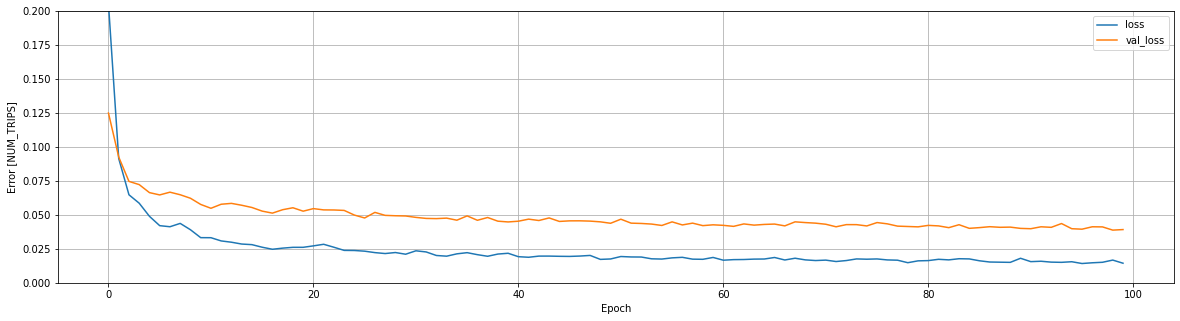

In [ ]:
plot_loss(history)

Finally we store the test results.

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Here, we can see that the **dnn_model** slightly outperforms both linear models. (Please note, the numbers can change a lot on each run... welcome to Machine Learning!)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_TRIPS]']).T

,Mean absolute error [NUM_TRIPS]
day_model,0.031513
linear_model,0.035532
dnn_model,0.034305


We covered a lot in this module. Take time to reflect and go over the notebook.

## Module 5: Using the outcomes

In this section we are going to think a little differently. This is simply because we have just shown that our **dnn_model** had the lowest **MAE**. However, communicating this to stakeholders is another thing, and in fact, just because a model works well, doesn't mean that it is useful.

To help explain this further, we will:

* Use our models to help us to help make predictions over three months.  

* Do some simple analysis between these predictions and actual values (using visualisations as the **MAE** is effectively doing this).

* Learn how to calculate return on investment (ROI). (This will actually be more like a discussion about it and the implication of the model in our company's market.)

* Shape our presentation to be focused on solving a business problem.

Firstly, we will get the data and put it in our Google Drive.

In [ ]:
df_2014_test_data = pd.read_csv('gdrive/My Drive/testdata2014.csv')

Sort the data, just in case.

In [ ]:
df_2014_test_data = df_2014_test_data.sort_values(["year", "mo", "da"], ascending = (True, True, True))

Then we run our linear model using the **.predict (method)**. As you can see, I have selected the **day** column from the dataframe and the top 90 values. Since **day** is ordered, this is approximately three months.

We then print out these predictions after scaling back up using our **scale_factor**.

In [ ]:
linear_day_predictions = day_model.predict(df_2014_test_data["day"][:90])*scale_factor
linear_day_predictions #

array([[464995.74184418],
       [488769.88887787],
       [512544.03591156],
       [536318.18294525],
       [560092.2703743 ],
       [417447.47757912],
       [441221.59481049],
       [464995.74184418],
       [488769.88887787],
       [512544.03591156],
       [536318.18294525],
       [560092.2703743 ],
       [417447.47757912],
       [441221.59481049],
       [464995.74184418],
       [488769.88887787],
       [512544.03591156],
       [536318.18294525],
       [560092.2703743 ],
       [417447.47757912],
       [441221.59481049],
       [464995.74184418],
       [488769.88887787],
       [512544.03591156],
       [536318.18294525],
       [560092.2703743 ],
       [417447.47757912],
       [441221.59481049],
       [464995.74184418],
       [488769.88887787],
       [512544.03591156],
       [536318.18294525],
       [560092.2703743 ],
       [417447.47757912],
       [441221.59481049],
       [464995.74184418],
       [488769.88887787],
       [512544.03591156],
       [5363

Next, let's plot these against the actual results in a scatter plot.

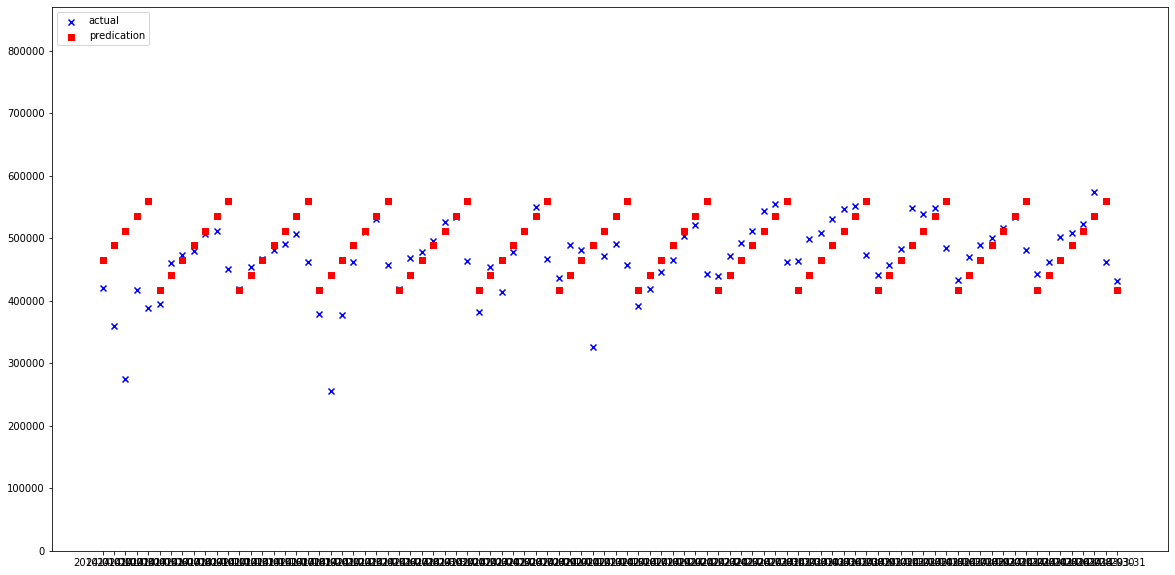

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(df_2014_test_data["pickup_date"][:90], df_2014_test_data["NUM_TRIPS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2014_test_data["pickup_date"][:90], linear_day_predictions[:90], c='r', marker='s', label='predication')
plt.ylim(0, 870000)
plt.legend(loc='upper left')
plt.show()

It's not so surprising to see that there is a linear increase day by day of the number of taxi trips in our model's predictions.

Although this is fairly crude, and in very few cases does it model the number of taxi trips accurately, only a couple of predictions are problematic – for example where the predictions are much lower than the actual number. In this instance there is a chance that there will be missed taxi trips or disgruntled customers. However, without rich contextual information such as locations and trip times, we can't be certain if it would be a big problem.

Next, let's set up a dataframe with **day** and **temp**. Although I previously identified a possible linear correlation between **temp** and **NUM_TRIPS**, it wasn't very good. Therefore I assume there will be little change or even a reduction in quality, which is what we saw in our **MAE**.

In [ ]:
input_data_multi_linear = [df_2014_test_data["day"][:90], df_2014_test_data["temp"][:90]]
headers = ["day","temp"]
df_input_data_multi_linear = pd.concat(input_data_multi_linear, axis=1, keys=headers)
df_input_data_multi_linear

,day,temp
7,3,28.2
21,4,28.5
2,5,15.6
17,6,15.8
9,7,30.3
...,...,...
81,4,30.5
80,5,48.0
75,6,50.7
84,7,45.3


Use this input dataframe (above) to make a prediction.

In [ ]:
df_input_data_multi_linear = pd.concat(input_data_multi_linear, axis=1, keys=headers)
linear_multi_predictions = linear_model.predict(df_input_data_multi_linear)*scale_factor
linear_multi_predictions

array([[505201.51853561],
       [517351.03130341],
       [549574.97119904],
       [561876.59502029],
       [552430.8681488 ],
       [453528.28502655],
       [516776.38292313],
       [528469.62213516],
       [522217.57173538],
       [524177.78968811],
       [513363.36135864],
       [526121.19913101],
       [457938.58170509],
       [462027.8775692 ],
       [483302.14619637],
       [500774.44314957],
       [515813.46988678],
       [528723.35910797],
       [554255.84316254],
       [463565.49859047],
       [497158.1697464 ],
       [529382.10964203],
       [540771.24595642],
       [550943.73226166],
       [552751.83916092],
       [565965.8908844 ],
       [469952.82173157],
       [508412.00351715],
       [521626.05524063],
       [528452.81362534],
       [526611.03010178],
       [526442.17014313],
       [529923.14100266],
       [468888.28277588],
       [492443.71056557],
       [499726.68290138],
       [519176.00631714],
       [531325.51908493],
       [5465

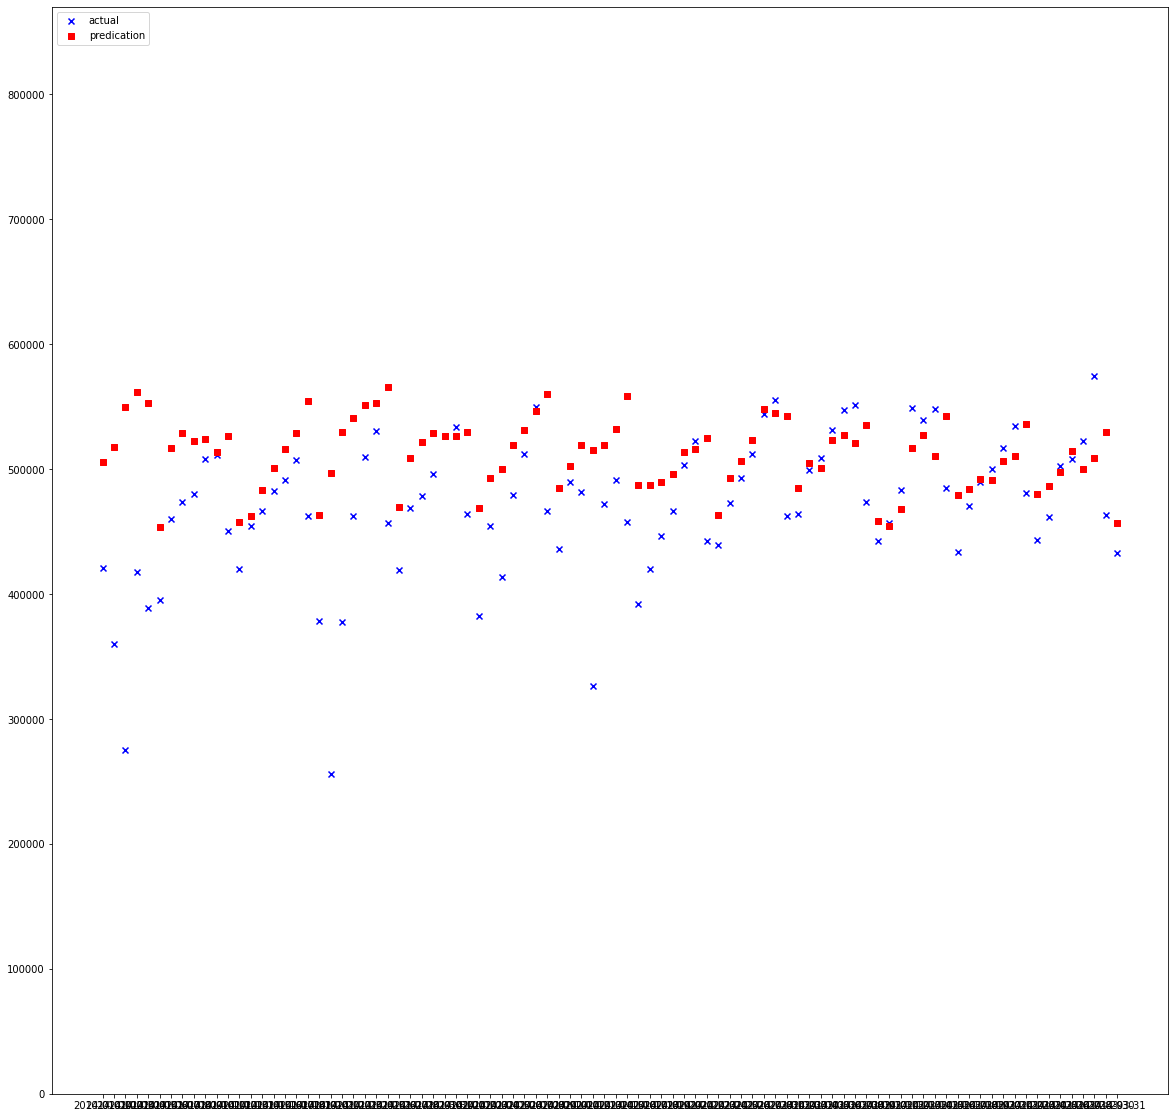

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(df_2014_test_data["pickup_date"][:90], df_2014_test_data["NUM_TRIPS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2014_test_data["pickup_date"][:90], linear_multi_predictions[:90], c='r', marker='s', label='predication')
plt.ylim(0, 870000)
plt.legend(loc='upper left')
plt.show()

Weirdly, this is possibly a little worse, but the difference is on the side of error – where there is only one actual **NUM_TRIPS** value for a given day that is higher than the amount predicted, and even then, it is a marginal difference. Although this is effectively a worse model, it looks as though this may give the best ROI without damaging the product.

Lastly, let's set up our DNN data. First, we One-Hot Encode our categorical data.

In [ ]:
df_2014_test_data_dnn = df_2014_test_data
# One-Hot Encoding for day
df_2014_test_data_dnn['day'] = df_2014_test_data_dnn['day'].map({ 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})
df_2014_test_data_dnn = pd.get_dummies(df_2014_test_data_dnn, columns=['day'], prefix='', prefix_sep='')

# One-Hot Encoding for month
df_2014_test_data_dnn['mo'] = df_2014_test_data_dnn['mo'].map({ 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df_2014_test_data_dnn = pd.get_dummies(df_2014_test_data_dnn, columns=['mo'], prefix='', prefix_sep='')


Let's have a quick check over the data.

In [ ]:
df_2014_test_data_dnn

,year,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
7,2014,1,2014-01-01,28.2,10.7,1026.8,10.0,5.1,8.9,20.0,33.1,21.0,0.00,999.9,0,420810,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
21,2014,2,2014-01-02,28.5,19.6,1018.8,9.2,9.8,15.0,21.0,33.1,24.1,0.02,999.9,0,359958,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,2014,3,2014-01-03,15.6,6.7,1014.9,3.8,10.1,15.0,25.1,24.8,10.0,0.58,999.9,1,275470,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17,2014,4,2014-01-04,15.8,-1.4,1031.0,10.0,4.0,8.0,17.1,28.0,8.1,0.02,5.9,0,417499,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,2014,5,2014-01-05,30.3,21.9,1025.6,6.4,3.8,7.0,15.0,36.0,27.0,0.00,5.9,1,388542,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2014,27,2014-12-27,47.7,30.1,1022.9,10.0,3.5,7.0,999.9,55.0,39.9,0.00,999.9,0,323696,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
363,2014,28,2014-12-28,49.4,36.8,1014.8,9.1,5.0,9.9,19.0,55.0,44.1,0.00,999.9,0,323916,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
351,2014,29,2014-12-29,41.4,21.6,1020.3,10.0,4.8,9.9,18.1,54.0,37.9,0.10,999.9,0,339450,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
336,2014,30,2014-12-30,32.5,14.6,1026.9,10.0,4.3,7.0,15.0,44.1,30.0,0.00,999.9,0,377702,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Then let's create a dataframe from the inputs we want.

In [ ]:
array_2014_test_data_dnn = [df_2014_test_data_dnn["year"], df_2014_test_data_dnn["temp"], df_2014_test_data_dnn["dewp"], df_2014_test_data_dnn["slp"], df_2014_test_data_dnn["visib"], df_2014_test_data_dnn["wdsp"], df_2014_test_data_dnn["gust"], df_2014_test_data_dnn["prcp"], df_2014_test_data_dnn["sndp"], df_2014_test_data_dnn["fog"], df_2014_test_data_dnn["Sunday"], df_2014_test_data_dnn["Monday"], df_2014_test_data_dnn["Tuesday"], df_2014_test_data_dnn["Wednesday"], df_2014_test_data_dnn["Thursday"], df_2014_test_data_dnn["Friday"], df_2014_test_data_dnn["Saturday"], df_2014_test_data_dnn["January"], df_2014_test_data_dnn["February"], df_2014_test_data_dnn["March"], df_2014_test_data_dnn["April"], df_2014_test_data_dnn["May"], df_2014_test_data_dnn["June"], df_2014_test_data_dnn["July"], df_2014_test_data_dnn["August"], df_2014_test_data_dnn["September"], df_2014_test_data_dnn["October"], df_2014_test_data_dnn["November"], df_2014_test_data_dnn["December"]]
headers = ["year","temp","dewp","slp","visib","wdsp","gust","prcp","sndp","fog","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","January","February","March","April","May","June","July","August","September","October","November","December"]
df_2014_test_data_dnn_cleaned = pd.concat(array_2014_test_data_dnn, axis=1, keys=headers)
df_2014_test_data_dnn_cleaned.head()

,year,temp,dewp,slp,visib,wdsp,gust,prcp,sndp,fog,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,January,February,March,April,May,June,July,August,September,October,November,December
7,2014,28.2,10.7,1026.8,10.0,5.1,20.0,0.00,999.9,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21,2014,28.5,19.6,1018.8,9.2,9.8,21.0,0.02,999.9,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2014,15.6,6.7,1014.9,3.8,10.1,25.1,0.58,999.9,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17,2014,15.8,-1.4,1031.0,10.0,4.0,17.1,0.02,5.9,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,2014,30.3,21.9,1025.6,6.4,3.8,15.0,0.00,5.9,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


Let's get our predictions.

In [ ]:
dnn_predictions_2014 = dnn_model.predict(df_2014_test_data_dnn_cleaned[:90])*scale_factor

Next, let's create our plot based on these predictions.

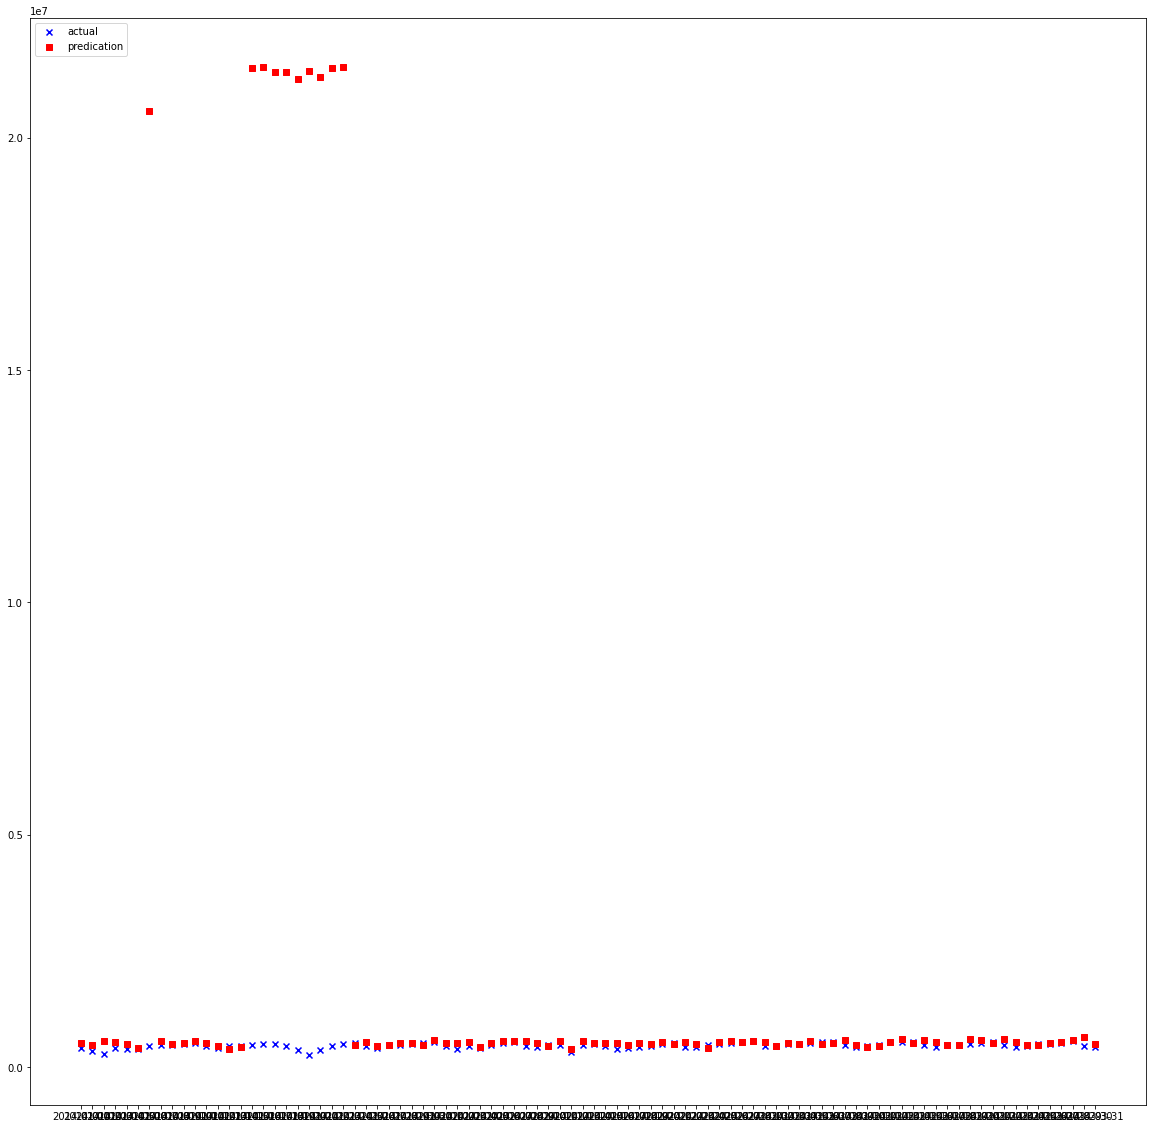

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(df_2014_test_data["pickup_date"][:90], df_2014_test_data["NUM_TRIPS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2014_test_data["pickup_date"][:90], dnn_predictions_2014, c='r', marker='s', label='predication')
plt.legend(loc='upper left')
plt.show()

We have a few issues with our predictions.
Some predictions are very high indeed. Perhaps there is some overfitting here. But the other predictions are absolutely fine (it looks like). This would need further investigation but let's take a good look by excluding the obviously bad predictions.


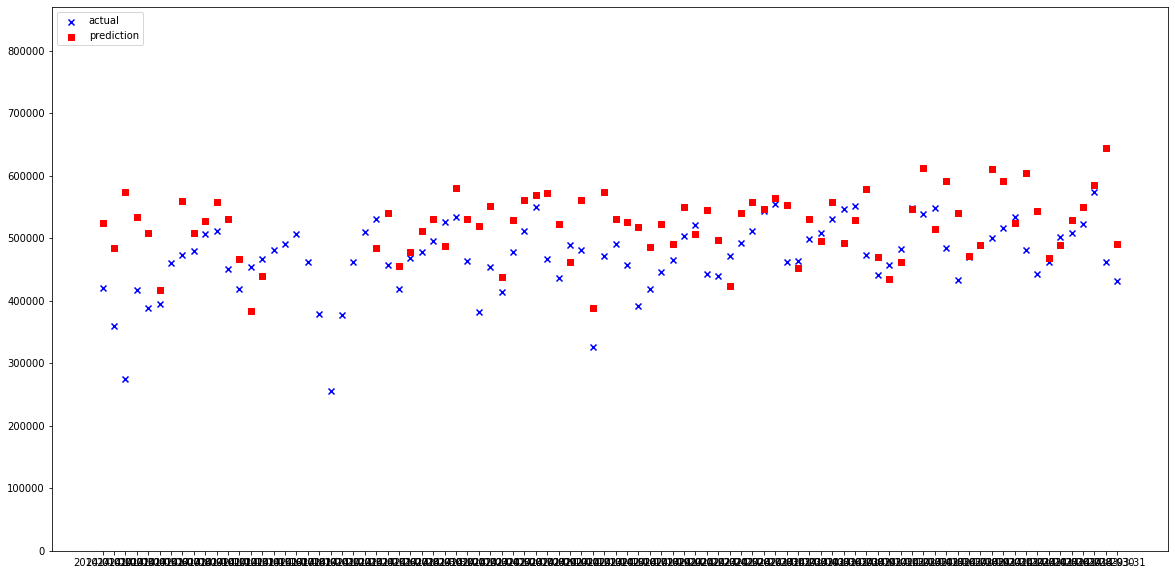

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(df_2014_test_data["pickup_date"][:90], df_2014_test_data["NUM_TRIPS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2014_test_data["pickup_date"][:90], dnn_predictions_2014, c='r', marker='s', label='prediction')
plt.ylim(0, 870000)
plt.legend(loc='upper left')
plt.show()

This is very interesting. It does appear to do a better job of predicting, rather than being obviously linear, and it mostly follows the shape. There is maybe one bigger than marginal error (and obviously the erroneous predictions, which could potentially be costly) but it is interesting.

What are we going to do with this? We need to do some crude implementation to work out some kind of ROI in this instance. Firstly, let's make up some baseline figures:

* From the original data, the maximum number of taxi trips on a given day is 849,414. The company covers the cost for up to 850,000 trips, which is deemed acceptable and has only started to return values that are around breaking even.
*   Each taxi trip made has an average value to the company of 11 dollars, where each expected trip costs the company 6 dollars.
*   As such, the company hires enough people to cover the cost of 850,000 trips at 6 dollars, which costs the company 5,100,000 dollars per day. On average, there are 475,115 trips in a given day (average), which returns 5,226,265 dollars.
*   It is anticipated that the costs per day for each expected taxi trip are to increase at a rate greater than the actual value for a taxi trip due to more competition. Obviously, we could just lower the rate of the expected number of trips as it is quite high, but this is a simple example.
*   The accuracy of the model is only part of the issue here, as mentioned before. Say the prediction is higher by 37,090 – where the actual is 400,000 trips on a given day. This is a great result as we obtain 4.4 million dollars and only expend 2,622,540 dollars. This gives a profit of 1,777,460 dollars.
*   It's if things are the other way around that then problems may start to occur. For example, if the actual number of trips is 400,000 and the predicted is 362,910, then we obtain 3,992,010 dollars with costs of 2,400,000 dollars, giving an overall profit of 1,592,010 dollars.

I know that you might be thinking that this isn't so bad. But what if most of the predictions undershoot? Then there is a chance that this will drive our customers to rivals and consequently the actual number of trips could begin to reduce.

Therefore, although the models are all fairly strong – with the **MAE** showing that the predictions of all models have an average error ranging from approximately 32,000 to 38,000 (in this run) – it might be safer to simply use this and utilise a baseline safety figure until the models are better understood.

Let's take a nice little example to our stakeholders by calculating the actual profit (or loss) of our models.

First is our baseline: we use the expected 850,000 trips and the actual number of trips, then multiply by their value in dollars for each (11 for actual trips and -6 for expected trips).



In [ ]:
# baseline
baseline_profit = (df_2014_test_data["NUM_TRIPS"][:90]*11 - np.repeat(850000, 90)*6).sum()
baseline_profit

6018510

Good. We got a profit of just over 6 million dollars over 3 months. Now the linear model with only **day** as input.

In [ ]:
linear_day_profit = ((df_2014_test_data["NUM_TRIPS"][:90]*11 - linear_day_predictions.squeeze()*6)).sum()
linear_day_profit

200797482.56612778

Great! Now this is in the hundreds of millions of dollars.

Now, our next linear model with two inputs.

In [ ]:
linear_multi_profit = ((df_2014_test_data["NUM_TRIPS"][:90]*11 - linear_multi_predictions.squeeze()*6)).sum()
linear_multi_profit

188928580.35970688

Not as good but inflated predictions mean less missed taxi trips, perhaps.

Lastly, the DNN model.

In [ ]:
dnn_profit = ((df_2014_test_data["NUM_TRIPS"][:90]*11 - dnn_predictions_2014.squeeze()*6)).sum()
dnn_profit

-1065520345.7910919

This looks a bit strange and maybe a bit unfair. Let's replace the bad predictions with our old upper limit of 850,000 trips.

In [ ]:
dnn_predictions_2014[dnn_predictions_2014 > 850000] = 850000

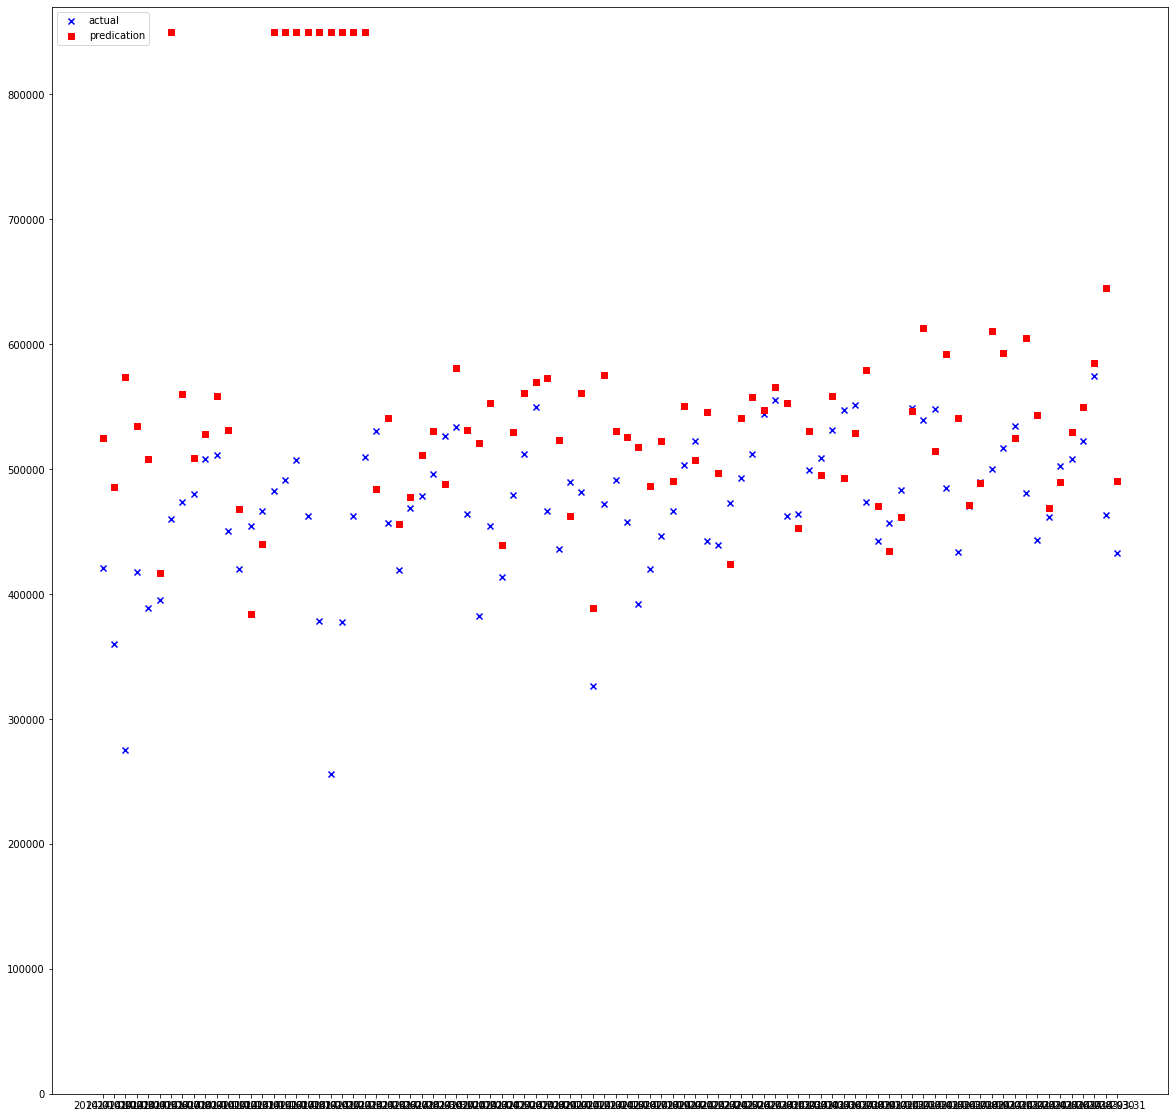

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(df_2014_test_data["pickup_date"][:90], df_2014_test_data["NUM_TRIPS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2014_test_data["pickup_date"][:90], dnn_predictions_2014, c='r', marker='s', label='predication')
plt.ylim(0, 870000)
plt.legend(loc='upper left')
plt.show()

In [ ]:
dnn_profit = ((df_2014_test_data["NUM_TRIPS"][:90]*11 - dnn_predictions_2014.squeeze()*6)).sum()
dnn_profit

164172986.88102722

That is pretty good as well and makes a lot of sense too. However, I don't trust the results of the DNN at this moment in time – but the way it is able to work out the pattern should be looked into. On this run the single input linear regressor was the most accurate. However in terms of the business, a better optimisation may be the multiple input linear regressor or a DNN with some kind of fail-safe condition. Instead of the max, the third (upper) quartile or the mean **(which is used here)**.

In [ ]:
dnn_predictions_2014[dnn_predictions_2014 == 850000] = 475115

In [ ]:
dnn_profit = ((df_2014_test_data["NUM_TRIPS"][:90]*11 - dnn_predictions_2014.squeeze()*6)).sum()
dnn_profit

186666086.88102722

As you can see, the DNN has the potential to obtain similar or even higher returns.

As a point, these are not great examples – they are grossly inflated and part of a fake scenario – but ultimately they are just for a bit of fun while learning. Obviously, it is unlikely that you will be able to obtain 20 or 30 times the profit with a small tool like this. But marginal gains are always possible. As you can see, using this method is illustrative and easy for people to understand with a focus on the business problem.